<a href="https://colab.research.google.com/github/aziz0519/Python-Programs/blob/master/Text_analytics_of_blockchain_whitepapers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mount drive

from google.colab import drive
from google.colab import files 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#essential libraries
import random
import datetime
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
#import stats libraries
from scipy.stats import skew, norm
from scipy.stats import boxcox_normmax
from scipy.special import boxcox1p

In [3]:
#load data
data = pd.read_json(r"/content/drive/My Drive/df.json",orient='colunms')
data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1


In [4]:
data.shape

(884, 10)

In [5]:
def tsplit(s,sep):
  stack = [s]
  for char in sep:
    pieces = []
    for substr in stack:
      pieces.extend(substr.split(char))
      stack = pieces
  return stack

first_text = data['text'][0]
first_text

'The 0Chain Consensus Protocol\n\nJonathan Katz1(cid:63), Thomas Austin2, Siva Dirisala3, and Saswata Basu3\n\n1 Dept. of Computer Science, University of Maryland.\n\n2 0Chain LLC and San Jose State University.\n\n3 0Chain LLC.\n\nAbstract. We describe the 0Chain blockchain ecosystem, including a\nnew consensus protocol oﬀering fast ﬁnality. We provide proofs of security\nfor the protocol, along with experiment results validating its eﬃciency\nunder realistic network conditions.\n\n1\n\nIntroduction\n\nSince the advent of Bitcoin [Nak09], the blockchain has revolutionized the world\nof cryptocurrencies and distributed computation. Ethereum [Woo14] further de-\nveloped this promise by integrating Turing-complete smart contracts into the\nblockchain for building distributed applications (dApps).\n\nDespite the promise of blockchain protocols, they have been held back by\ntheir slow consensus times. For example, in Bitcoin a transaction is not con-\nsidered ﬁnalized until it is six blocks

In [6]:
clean_text = []
clean_text_length = []

for text in data['text']:
  split_text = tsplit(text, (" ","\n","-\n","\t","\r","\u2000","\u200b","cid:","\xa0","\x0c", "(", ")"))
  split_text = [i for i in split_text if i != '']
  clean_text.append(split_text)
  clean_text_length.append(len(split_text))
  
len(clean_text)

884

In [7]:
data['clean_text'] = clean_text
data['clean_text_length'] = clean_text_length
data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1,"[0xcert, protocol, Whitepaper, 0.6, Authors:, ...",13605
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1,"[General, Information, -, Whitepaper, as, of, ...",1340
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1,"[Legal, Disclaimer, The, purpose, of, this, Wh...",10409


In [8]:
!pip install textstat

In [0]:
import textstat
from itertools import groupby
from string import punctuation

In [10]:
def retrieve_str(x):
  if len(x) == 0:
    return ''
  else:
    return ' '.join(x)
  
#Clean text and remove punctuation

def remove_dup_punc(x):
  new_text = []
  for k,g in groupby(x):
    if k in set(punctuation):
      new_text.append(k)
    else:
      new_text.extend(g)
  return ' '.join(new_text)

#create new column
data = data.sort_index()
data['clean_text2'] = data['clean_text'].apply(remove_dup_punc)
data['readability'] = data['clean_text2'].apply(textstat.automated_readability_index)

data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,readability
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004,The 0Chain Consensus Protocol Jonathan Katz1 6...,14.0
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289,0x: An open protocol for decentralized exchang...,17.0
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1,"[0xcert, protocol, Whitepaper, 0.6, Authors:, ...",13605,0xcert protocol Whitepaper 0.6 Authors: Kristi...,17.9
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1,"[General, Information, -, Whitepaper, as, of, ...",1340,General Information - Whitepaper as of July 20...,14.6
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1,"[Legal, Disclaimer, The, purpose, of, this, Wh...",10409,Legal Disclaimer The purpose of this White Pap...,28.4


In [11]:
data['readability'].describe()

count      884.000000
mean        49.081222
std        393.381050
min          0.000000
25%         15.400000
50%         17.400000
75%         20.000000
max      10441.100000
Name: readability, dtype: float64

In [12]:
data[data.readability >= 50.0]

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,readability
90,Bitblocks,W\nH\nI\nT\nE\nP\nA\nP\nE\nR\nB\nU\nS\nI\nN\nE...,13281,bitblocks-project,03/04/2018,0.004956,09/09/2019,0.000999,-0.003958,1,"[W, H, I, T, E, P, A, P, E, R, B, U, S, I, N, ...",13251,W H I T E P A P E R B U S I N E S S – G A M E ...,50.9
96,Bitcoin Diamond,䈀椀琀挀漀椀渀 䐀椀愀洀漀渀搀\n\n圀栀椀琀攀瀀愀瀀攀爀\n\n㈀ ㄀㠀⸀ 㜀\n\n 吀...,3535,bitcoin-diamond,03/12/2017,50.751656,09/09/2019,0.599059,-50.152597,1,"[䈀椀琀挀漀椀渀, 䐀椀愀洀漀渀搀, 圀栀椀琀攀瀀愀瀀攀爀, ㈀ ㄀㠀⸀ 㜀, 吀䄀䈀䰀䔀,...",3506,䈀椀琀挀漀椀渀 䐀椀愀洀漀渀搀 圀栀椀琀攀瀀愀瀀攀爀 ㈀ ㄀㠀⸀ 㜀 吀䄀䈀䰀䔀 伀䘀 䌀伀...,1772.3
99,Bitcoin Incognito,䤀一䌀伀䜀一䤀吀伀\n\n圀 䠀 䤀 吀 䔀 倀 䄀 倀 䔀 刀\n\n 吀栀攀 䔀渀瘀椀爀...,3286,bitcoin-incognito,07/08/2018,0.031189,09/09/2019,0.028205,-0.002984,1,"[䤀一䌀伀䜀一䤀吀伀, 圀, 䠀, 䤀, 吀, 䔀, 倀, 䄀, 倀, 䔀, 刀, 吀栀攀,...",3234,䤀一䌀伀䜀一䤀吀伀 圀 䠀 䤀 吀 䔀 倀 䄀 倀 䔀 刀 吀栀攀 䔀渀瘀椀爀漀渀洀攀渀琀愀...,1643.8
167,CMITCOIN,\n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n ...,746,cmitcoin,16/10/2018,0.000069,08/09/2019,0.000005,-0.000064,1,"[THE, CMITCOIN, PROJECT, WHITEPAPER, Ver1.1, 2...",746,THE CMITCOIN PROJECT WHITEPAPER Ver1.1 2018/8/...,96.4
170,CoinMeet,White Paper V1.0 EN \n\n(cid:21)(cid:19)(cid...,2034,coinmeet,11/02/2018,0.094760,09/09/2019,0.010880,-0.083880,1,"[White, Paper, V1.0, EN, 21, 19, 20, 26, 18, 2...",18455,White Paper V1.0 EN 21 19 20 26 18 20 21 324 3...,529.1
180,Content Value Network,CVN白皮书\n\n基于区块链技术的内容价值网络\n\n 基于区块链技术的内容价值网络\n\...,907,content-value-network,03/01/2019,0.014081,09/09/2019,0.029383,0.015303,0,"[CVN白皮书, 基于区块链技术的内容价值网络, 基于区块链技术的内容价值网络, 目录, 一...",913,CVN白皮书 基于区块链技术的内容价值网络 基于区块链技术的内容价值网络 目录 一、概述 二...,194.0
200,Cryptoinvest,CRYPTO\nINVEST\n\nMinimize Risks Maximize Inve...,19381,cryptoinvest,10/01/2019,2.982445,30/08/2019,0.000387,-2.982058,1,"[CRYPTO, INVEST, Minimize, Risks, Maximize, In...",19355,CRYPTO INVEST Minimize Risks Maximize Investme...,55.3
247,DPRating,DPRating.com \n\n \n\nCONTENT \n\n \n\n(cid:2...,6502,dprating,11/08/2018,0.000886,09/09/2019,0.000241,-0.000645,1,"[DPRating.com, CONTENT, 20, 17, 3, 44, 81, 87,...",79835,DPRating.com CONTENT 20 17 3 44 81 87 85 82 71...,592.3
300,EuroCoinToken,\n\n \n \n \n \n \n \n \n \n \n \n \n \n \n \...,171,eurocoinpay,31/01/2019,0.090299,09/09/2019,0.045324,-0.044976,1,"[Version, 1.01, –, January, 2019, White, Paper...",171,Version 1.01 – January 2019 White Paper 2 .......,179.9
308,Excaliburcoin,2018WHITE PAPER About\nExcalibur Coin\n\nExcal...,70,excaliburcoin,14/08/2018,0.000063,08/09/2019,0.000006,-0.000056,1,"[2018WHITE, PAPER, About, Excalibur, Coin, Exc...",62,2018WHITE PAPER About Excalibur Coin Excalibur...,189.3


In [13]:
data['clean_text2'][472]

'1 26 13 27 29 1 3 12 1 13 14 28 29 27 13 15 29 1 1 1 40 51 48 2 48 56 48 61 50 48 57 46 48 2 58 49 2 45 55 58 46 54 46 51 44 52 57 2 63 48 46 51 57 58 55 58 50 68 2 45 61 52 57 50 62 2 64 62 2 48 57 58 61 56 58 64 62 2 45 48 57 48 49 52 63 62 7 2 45 64 63 2 63 51 48 2 59 48 61 49 58 61 56 44 57 46 48 2 44 57 47 2 62 46 44 55 44 45 52 55 52 63 68 2 52 62 62 64 48 62 2 56 44 54 48 62 2 52 63 2 47 52 49 49 52 46 64 55 63 2 49 58 61 2 45 55 58 46 54 46 51 44 52 57 2 63 48 46 51 57 58 55 58 50 68 2 63 58 2 45 48 2 66 52 47 48 55 68 2 44 47 58 59 63 48 47 9 2 43 48 2 46 44 57 2 63 61 64 55 68 2 48 56 45 61 44 46 48 2 63 51 48 2 45 48 57 48 49 52 63 62 2 58 49 2 45 55 58 46 54 46 51 44 52 57 2 63 48 46 51 57 58 55 58 50 68 2 58 57 55 68 2 66 51 48 57 2 66 48 2 62 58 55 65 48 2 63 51 48 2 59 48 61 49 58 61 56 44 57 46 48 2 44 57 47 2 62 46 44 55 44 45 52 55 52 63 68 2 52 62 62 64 48 62 9 2 43 48 2 59 61 58 59 58 62 48 2 44 2 62 58 55 64 63 52 58 57 2 63 58 2 63 51 48 2 59 48 61 49 58 61 56 44

In [14]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
def preprocess(text):
  text = text.lower()
  text = re.sub('[^a-zA-Z]+',' ',text)
  words = text.split()
  wnl = WordNetLemmatizer()
  words2 = [wnl.lemmatize(word) for word in words if not word in set(stopwords.words('english'))]
  words3 = ' '.join(words2)
  return words3

In [0]:
data['clean_text3'] = data['clean_text2'].astype(str).apply(preprocess)

In [18]:
data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,readability,clean_text3
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004,The 0Chain Consensus Protocol Jonathan Katz1 6...,14.0,chain consensus protocol jonathan katz thomas ...
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289,0x: An open protocol for decentralized exchang...,17.0,x open protocol decentralized exchange ethereu...
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1,"[0xcert, protocol, Whitepaper, 0.6, Authors:, ...",13605,0xcert protocol Whitepaper 0.6 Authors: Kristi...,17.9,xcert protocol whitepaper author kristijan sed...
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1,"[General, Information, -, Whitepaper, as, of, ...",1340,General Information - Whitepaper as of July 20...,14.6,general information whitepaper july introducti...
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1,"[Legal, Disclaimer, The, purpose, of, this, Wh...",10409,Legal Disclaimer The purpose of this White Pap...,28.4,legal disclaimer purpose white paper present w...


In [19]:
data.columns

Index(['coin', 'text', 'length', 'coin_id', 'first_date', 'first_price',
       'latest_date [9/9/19]', 'latest_price', 'price_change',
       'price_drop_true', 'clean_text', 'clean_text_length', 'clean_text2',
       'readability', 'clean_text3'],
      dtype='object')

In [20]:
day_diff = []

for num in range(len(data)):
  date_start = data['first_date'][num]
  date_start_formatted = datetime.datetime.strptime(date_start, "%d/%m/%Y")
  date_end = data['latest_date [9/9/19]'][num]
  date_end_formatted = datetime.datetime.strptime(date_end, "%d/%m/%Y")
  days_diff = date_end_formatted - date_start_formatted
  day_diff.append(days_diff.days)

len(day_diff)
  

884

In [21]:
data['day_diff'] = day_diff
data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,readability,clean_text3,day_diff
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004,The 0Chain Consensus Protocol Jonathan Katz1 6...,14.0,chain consensus protocol jonathan katz thomas ...,417
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289,0x: An open protocol for decentralized exchang...,17.0,x open protocol decentralized exchange ethereu...,692
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1,"[0xcert, protocol, Whitepaper, 0.6, Authors:, ...",13605,0xcert protocol Whitepaper 0.6 Authors: Kristi...,17.9,xcert protocol whitepaper author kristijan sed...,424
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1,"[General, Information, -, Whitepaper, as, of, ...",1340,General Information - Whitepaper as of July 20...,14.6,general information whitepaper july introducti...,193
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1,"[Legal, Disclaimer, The, purpose, of, this, Wh...",10409,Legal Disclaimer The purpose of this White Pap...,28.4,legal disclaimer purpose white paper present w...,535


In [0]:
from wordcloud import WordCloud

In [23]:
long_string = ",".join(list(data['clean_text3'].values))

print(len(long_string))

27098530


In [0]:
from wordcloud import STOPWORDS, ImageColorGenerator

In [0]:
stopwords  = set(STOPWORDS)
stopwords.update(["well","time","use","data","one","based","make","new","provide","whitepaper","white"])

In [0]:
wordcloud = WordCloud(width = 400, height = 300, background_color = "white", max_words = 500, contour_width = 3 , contour_color= 'steelblue', stopwords = stopwords).generate(long_string) 

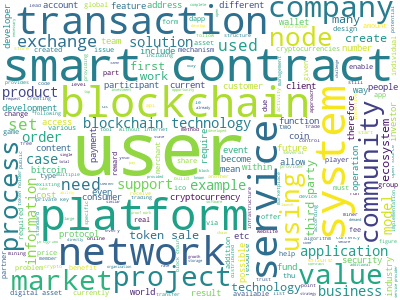

In [27]:
wordcloud.to_image()

In [28]:
list_words = []
list_words_length = []

for i in range(len(data)):
  split_text = data['clean_text3'][i].split()
  list_words.append(split_text)
  list_words_length.append(len(split_text))

len(list_words)

884

In [29]:
data['text_corpus'] = list_words
data['text_corpus_length'] = list_words_length
data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,readability,clean_text3,day_diff,text_corpus,text_corpus_length
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004,The 0Chain Consensus Protocol Jonathan Katz1 6...,14.0,chain consensus protocol jonathan katz thomas ...,417,"[chain, consensus, protocol, jonathan, katz, t...",2232
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289,0x: An open protocol for decentralized exchang...,17.0,x open protocol decentralized exchange ethereu...,692,"[x, open, protocol, decentralized, exchange, e...",3036
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1,"[0xcert, protocol, Whitepaper, 0.6, Authors:, ...",13605,0xcert protocol Whitepaper 0.6 Authors: Kristi...,17.9,xcert protocol whitepaper author kristijan sed...,424,"[xcert, protocol, whitepaper, author, kristija...",8034
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1,"[General, Information, -, Whitepaper, as, of, ...",1340,General Information - Whitepaper as of July 20...,14.6,general information whitepaper july introducti...,193,"[general, information, whitepaper, july, intro...",760
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1,"[Legal, Disclaimer, The, purpose, of, this, Wh...",10409,Legal Disclaimer The purpose of this White Pap...,28.4,legal disclaimer purpose white paper present w...,535,"[legal, disclaimer, purpose, white, paper, pre...",6470


In [32]:
data[(data.day_diff <= 200) & (data.price_drop_true == 1)]

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,readability,clean_text3,day_diff,text_corpus,text_corpus_length
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1,"[General, Information, -, Whitepaper, as, of, ...",1340,General Information - Whitepaper as of July 20...,14.6,general information whitepaper july introducti...,193,"[general, information, whitepaper, july, intro...",760
31,Aladdin,\n\nADN \n\nWHITEPAPER VERSION 1.0 \n\n \n\n1...,3761,aladdin,17/06/2019,0.000820,09/09/2019,0.000383,-0.000437,1,"[ADN, WHITEPAPER, VERSION, 1.0, 1., Introducti...",3796,ADN WHITEPAPER VERSION 1.0 1. Introduction 1.1...,16.2,adn whitepaper version introduction vision bac...,84,"[adn, whitepaper, version, introduction, visio...",2220
33,Albos,ALBOS WHITE PAPER\n\n1\n\n2019.04.11\nVer. .1....,4687,albos,20/04/2019,0.000106,08/09/2019,0.000050,-0.000055,1,"[ALBOS, WHITE, PAPER, 1, 2019.04.11, Ver., .1....",5183,ALBOS WHITE PAPER 1 2019.04.11 Ver. .1.2.6 2 I...,13.2,albos white paper ver n r u c n new cryptocurr...,141,"[albos, white, paper, ver, n, r, u, c, n, new,...",2747
63,B91,Draft for open community review and subject to...,7502,b91,11/06/2019,0.785586,09/09/2019,0.053018,-0.732568,1,"[Draft, for, open, community, review, and, sub...",7552,Draft for open community review and subject to...,18.8,draft open community review subject change b d...,90,"[draft, open, community, review, subject, chan...",4449
91,Bitcash,\n\n \n\n \n \n \n \n \n \n \n \n \n \n \n \n...,3541,bitcash,02/04/2019,0.111949,09/09/2019,0.031471,-0.080478,1,"[BitCash, Whitepaper, 1, What, is, BitCash?, B...",3564,BitCash Whitepaper 1 What is BitCash? BitCash ...,15.2,bitcash whitepaper bitcash bitcash cryptocurre...,160,"[bitcash, whitepaper, bitcash, bitcash, crypto...",2170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,Vanta Network,\n\n \n \n \n \nVANTA : INFINITY Connect \nDe...,21942,vanta-network,17/04/2019,0.000818,09/09/2019,0.000386,-0.000431,1,"[VANTA, :, INFINITY, Connect, Decentralized, N...",21958,VANTA : INFINITY Connect Decentralized Network...,16.0,vanta infinity connect decentralized network r...,145,"[vanta, infinity, connect, decentralized, netw...",12242
830,Vodi X,Decentralized\nEcommerce\nEcosystem\n\nCreatin...,7529,vodi-x,23/05/2019,0.021717,09/09/2019,0.001843,-0.019874,1,"[Decentralized, Ecommerce, Ecosystem, Creating...",6454,Decentralized Ecommerce Ecosystem Creating рпп...,1443.6,decentralized ecommerce ecosystem creating wor...,109,"[decentralized, ecommerce, ecosystem, creating...",156
841,WebDollar,\n\n \n \n \n \n \n \n \n \n \n\n \n\n \n\n \...,9569,webdollar,26/03/2019,0.000331,09/09/2019,0.000105,-0.000225,1,"[WebDollar, Cryptocurrency, Native, to, the, W...",9599,WebDollar Cryptocurrency Native to the World W...,18.1,webdollar cryptocurrency native world wide web...,167,"[webdollar, cryptocurrency, native, world, wid...",5415
851,Wink,\n \n \n \n \n\n \n\nWINk \nWhite Paper \n\n ...,6713,wink,01/08/2019,0.000452,09/09/2019,0.000251,-0.000200,1,"[WINk, White, Paper, Please, visit, Wink.org, ...",6724,WINk White Paper Please visit Wink.org for mor...,13.7,wink white paper please visit wink org informa...,39,"[wink, white, paper, please, visit, wink, org,...",4104


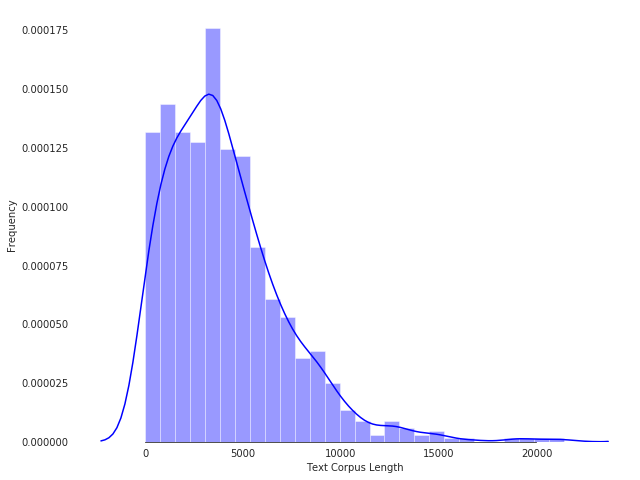

In [33]:
sns.set_style('white')
sns.set_palette('deep')
f, ax = plt.subplots(figsize=(10,8))
sns.distplot(data['text_corpus_length'], color= 'b')
ax.xaxis.grid(False)
ax.set(ylabel='Frequency')
ax.set(xlabel='Text Corpus Length')
sns.despine(trim=True,left=True)
plt.show()

In [0]:
hasBitcoin = []

for cleaned_list in data['text_corpus']:
  if 'bitcoin' and 'token' in [word.lower() for word in cleaned_list]:
    hasBitcoin.append(1)
  else:
    hasBitcoin.append(0)

In [0]:
hasLinkedIn = []

for cleaned_list in data['text_corpus']:
  if 'linkedin' in [word.lower() for word in cleaned_list]:
    hasLinkedIn.append(1)
  else:
    hasLinkedIn.append(0)

In [0]:
hasTeamInfo = []

for cleaned_list in data['text_corpus']:
  if 'team' in [word.lower() for word in cleaned_list]:
    hasTeamInfo.append(1)
  else:
    hasTeamInfo.append(0)

In [0]:
hasBlockchain = []

for cleaned_list in data['text_corpus']:
  if 'blockchain' in [word.lower() for word in cleaned_list]:
    hasBlockchain.append(1)
  else:
    hasBlockchain.append(0)

In [0]:
hasContract = []

for cleaned_list in data['text_corpus']:
  if 'contract' in [word.lower() for word in cleaned_list]:
    hasContract.append(1)
  else:
    hasContract.append(0)

In [0]:
hasUser = []

for cleaned_list in data['text_corpus']:
  if 'user' and 'customer' in [word.lower() for word in cleaned_list]:
    hasUser.append(1)
  else:
    hasUser.append(0)

In [0]:
hasNode =[]

for cleaned_list in data['text_corpus']:
  if 'node' in [word.lower() for word in cleaned_list]:
    hasNode.append(1)
  else:
    hasNode.append(0)

In [41]:
data['hasLinkedIn'] = hasLinkedIn
data['hasBitcoin'] = hasBitcoin
data['hasTeamInfo'] = hasTeamInfo
data['hasBlockchain'] = hasBlockchain
data['hasContract'] = hasContract
data['hasUser'] = hasUser
data['hasNode'] = hasNode
data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,readability,clean_text3,day_diff,text_corpus,text_corpus_length,hasLinkedIn,hasBitcoin,hasTeamInfo,hasBlockchain,hasContract,hasUser,hasNode
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004,The 0Chain Consensus Protocol Jonathan Katz1 6...,14.0,chain consensus protocol jonathan katz thomas ...,417,"[chain, consensus, protocol, jonathan, katz, t...",2232,0,1,0,1,1,0,1
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289,0x: An open protocol for decentralized exchang...,17.0,x open protocol decentralized exchange ethereu...,692,"[x, open, protocol, decentralized, exchange, e...",3036,0,1,0,1,1,1,1
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1,"[0xcert, protocol, Whitepaper, 0.6, Authors:, ...",13605,0xcert protocol Whitepaper 0.6 Authors: Kristi...,17.9,xcert protocol whitepaper author kristijan sed...,424,"[xcert, protocol, whitepaper, author, kristija...",8034,1,1,1,1,1,1,1
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1,"[General, Information, -, Whitepaper, as, of, ...",1340,General Information - Whitepaper as of July 20...,14.6,general information whitepaper july introducti...,193,"[general, information, whitepaper, july, intro...",760,0,1,1,1,0,1,0
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1,"[Legal, Disclaimer, The, purpose, of, this, Wh...",10409,Legal Disclaimer The purpose of this White Pap...,28.4,legal disclaimer purpose white paper present w...,535,"[legal, disclaimer, purpose, white, paper, pre...",6470,0,1,1,1,1,1,1


In [42]:
data['hasContract'].value_counts()

1    676
0    208
Name: hasContract, dtype: int64

In [43]:
data['hasBitcoin'].value_counts()

1    704
0    180
Name: hasBitcoin, dtype: int64

In [44]:
data['hasBlockchain'].value_counts()

1    790
0     94
Name: hasBlockchain, dtype: int64

In [45]:
data['hasUser'].value_counts()

1    504
0    380
Name: hasUser, dtype: int64

In [46]:
data['hasNode'].value_counts()

1    496
0    388
Name: hasNode, dtype: int64

In [0]:
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('coolwarm')

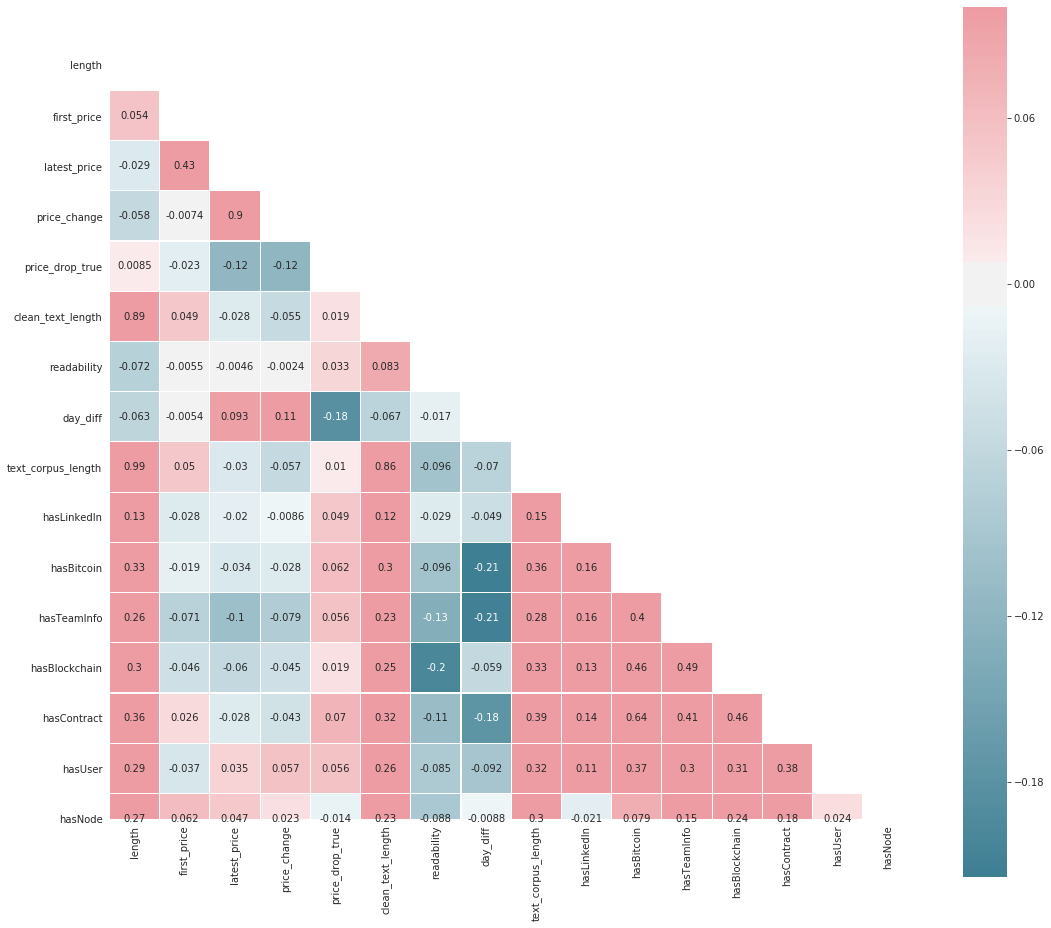

In [48]:
corr = data.corr()

mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize =(18,16))

cmap = sns.diverging_palette(220,10, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = cmap , vmax = .1 ,center =0, square=True, annot = True, linewidth = .1)


In [52]:
data[data.readability >= 50.0]

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,readability,clean_text3,day_diff,text_corpus,text_corpus_length,hasLinkedIn,hasBitcoin,hasTeamInfo,hasBlockchain,hasContract,hasUser,hasNode
90,Bitblocks,W\nH\nI\nT\nE\nP\nA\nP\nE\nR\nB\nU\nS\nI\nN\nE...,13281,bitblocks-project,03/04/2018,0.004956,09/09/2019,0.000999,-0.003958,1,"[W, H, I, T, E, P, A, P, E, R, B, U, S, I, N, ...",13251,W H I T E P A P E R B U S I N E S S – G A M E ...,50.9,w h e p p e r b u n e g e e c h n l g n r u c ...,524,"[w, h, e, p, p, e, r, b, u, n, e, g, e, e, c, ...",6531,0,0,0,1,0,0,0
96,Bitcoin Diamond,䈀椀琀挀漀椀渀 䐀椀愀洀漀渀搀\n\n圀栀椀琀攀瀀愀瀀攀爀\n\n㈀ ㄀㠀⸀ 㜀\n\n 吀...,3535,bitcoin-diamond,03/12/2017,50.751656,09/09/2019,0.599059,-50.152597,1,"[䈀椀琀挀漀椀渀, 䐀椀愀洀漀渀搀, 圀栀椀琀攀瀀愀瀀攀爀, ㈀ ㄀㠀⸀ 㜀, 吀䄀䈀䰀䔀,...",3506,䈀椀琀挀漀椀渀 䐀椀愀洀漀渀搀 圀栀椀琀攀瀀愀瀀攀爀 ㈀ ㄀㠀⸀ 㜀 吀䄀䈀䰀䔀 伀䘀 䌀伀...,1772.3,,645,[],0,0,0,0,0,0,0,0
99,Bitcoin Incognito,䤀一䌀伀䜀一䤀吀伀\n\n圀 䠀 䤀 吀 䔀 倀 䄀 倀 䔀 刀\n\n 吀栀攀 䔀渀瘀椀爀...,3286,bitcoin-incognito,07/08/2018,0.031189,09/09/2019,0.028205,-0.002984,1,"[䤀一䌀伀䜀一䤀吀伀, 圀, 䠀, 䤀, 吀, 䔀, 倀, 䄀, 倀, 䔀, 刀, 吀栀攀,...",3234,䤀一䌀伀䜀一䤀吀伀 圀 䠀 䤀 吀 䔀 倀 䄀 倀 䔀 刀 吀栀攀 䔀渀瘀椀爀漀渀洀攀渀琀愀...,1643.8,,398,[],0,0,0,0,0,0,0,0
167,CMITCOIN,\n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n ...,746,cmitcoin,16/10/2018,0.000069,08/09/2019,0.000005,-0.000064,1,"[THE, CMITCOIN, PROJECT, WHITEPAPER, Ver1.1, 2...",746,THE CMITCOIN PROJECT WHITEPAPER Ver1.1 2018/8/...,96.4,cmitcoin project whitepaper ver p p cmitcoin c...,327,"[cmitcoin, project, whitepaper, ver, p, p, cmi...",194,0,0,0,0,0,0,0
170,CoinMeet,White Paper V1.0 EN \n\n(cid:21)(cid:19)(cid...,2034,coinmeet,11/02/2018,0.094760,09/09/2019,0.010880,-0.083880,1,"[White, Paper, V1.0, EN, 21, 19, 20, 26, 18, 2...",18455,White Paper V1.0 EN 21 19 20 26 18 20 21 324 3...,529.1,white paper v en www coinmeet io white paper a...,575,"[white, paper, v, en, www, coinmeet, io, white...",715,0,0,1,0,0,0,0
180,Content Value Network,CVN白皮书\n\n基于区块链技术的内容价值网络\n\n 基于区块链技术的内容价值网络\n\...,907,content-value-network,03/01/2019,0.014081,09/09/2019,0.029383,0.015303,0,"[CVN白皮书, 基于区块链技术的内容价值网络, 基于区块链技术的内容价值网络, 目录, 一...",913,CVN白皮书 基于区块链技术的内容价值网络 基于区块链技术的内容价值网络 目录 一、概述 二...,194.0,cvn cvn cvn cvn cvn cvn cvn cvn cvn cvn cvn to...,249,"[cvn, cvn, cvn, cvn, cvn, cvn, cvn, cvn, cvn, ...",341,0,1,1,1,0,0,0
200,Cryptoinvest,CRYPTO\nINVEST\n\nMinimize Risks Maximize Inve...,19381,cryptoinvest,10/01/2019,2.982445,30/08/2019,0.000387,-2.982058,1,"[CRYPTO, INVEST, Minimize, Risks, Maximize, In...",19355,CRYPTO INVEST Minimize Risks Maximize Investme...,55.3,crypto invest minimize risk maximize investmen...,232,"[crypto, invest, minimize, risk, maximize, inv...",9867,0,0,0,0,0,0,0
247,DPRating,DPRating.com \n\n \n\nCONTENT \n\n \n\n(cid:2...,6502,dprating,11/08/2018,0.000886,09/09/2019,0.000241,-0.000645,1,"[DPRating.com, CONTENT, 20, 17, 3, 44, 81, 87,...",79835,DPRating.com CONTENT 20 17 3 44 81 87 85 82 71...,592.3,dprating com content dprating com dprating com...,394,"[dprating, com, content, dprating, com, dprati...",1078,0,1,1,1,1,1,0
300,EuroCoinToken,\n\n \n \n \n \n \n \n \n \n \n \n \n \n \n \...,171,eurocoinpay,31/01/2019,0.090299,09/09/2019,0.045324,-0.044976,1,"[Version, 1.01, –, January, 2019, White, Paper...",171,Version 1.01 – January 2019 White Paper 2 .......,179.9,version january white paper white paper white ...,221,"[version, january, white, paper, white, paper,...",46,0,0,0,0,0,0,0
308,Excaliburcoin,2018WHITE PAPER About\nExcalibur Coin\n\nExcal...,70,excaliburcoin,14/08/2018,0.000063,08/09/2019,0.000006,-0.000056,1,"[2018WHITE, PAPER, About, Excalibur, Coin, Exc...",62,2018WHITE PAPER About Excalibur Coin Excalibur...,189.3,white paper excalibur coin excalibur coin exca...,390,"[white, paper, excalibur, coin, excalibur, coi...",38,0,0,0,0,0,0,0


In [53]:
data.drop(data[data.readability >= 50.0].index, inplace=True)
data.reset_index(drop=True,inplace=True)
data.shape

(853, 25)

In [54]:
data[(data.readability >= 30.0) & (data.text_corpus_length >= 10000)]

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,readability,clean_text3,day_diff,text_corpus,text_corpus_length,hasLinkedIn,hasBitcoin,hasTeamInfo,hasBlockchain,hasContract,hasUser,hasNode
253,eBoost,WHITEPAPER | EBOOST\n\nEBOOST.FUN \n\n T A B L...,29040,eboost,14/11/2017,0.096307,09/09/2019,0.007007,-0.0893,1,"[WHITEPAPER, |, EBOOST, EBOOST.FUN, T, A, B, L...",29025,WHITEPAPER | EBOOST EBOOST.FUN T A B L E O F C...,32.9,whitepaper eboost eboost fun b l e f content t...,664,"[whitepaper, eboost, eboost, fun, b, l, e, f, ...",14738,0,1,1,1,1,0,0


In [0]:
from textblob import TextBlob

In [0]:
#Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. 
#Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. 
#Subjectivity is also a float which lies in the range of [0,1]

def polarity(x):
  return TextBlob(x).sentiment.polarity

In [57]:
data['polarity_scores'] = data['clean_text3'].apply(polarity)
data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,readability,clean_text3,day_diff,text_corpus,text_corpus_length,hasLinkedIn,hasBitcoin,hasTeamInfo,hasBlockchain,hasContract,hasUser,hasNode,polarity_scores
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004,The 0Chain Consensus Protocol Jonathan Katz1 6...,14.0,chain consensus protocol jonathan katz thomas ...,417,"[chain, consensus, protocol, jonathan, katz, t...",2232,0,1,0,1,1,0,1,0.035793
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289,0x: An open protocol for decentralized exchang...,17.0,x open protocol decentralized exchange ethereu...,692,"[x, open, protocol, decentralized, exchange, e...",3036,0,1,0,1,1,1,1,0.076354
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1,"[0xcert, protocol, Whitepaper, 0.6, Authors:, ...",13605,0xcert protocol Whitepaper 0.6 Authors: Kristi...,17.9,xcert protocol whitepaper author kristijan sed...,424,"[xcert, protocol, whitepaper, author, kristija...",8034,1,1,1,1,1,1,1,0.114156
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1,"[General, Information, -, Whitepaper, as, of, ...",1340,General Information - Whitepaper as of July 20...,14.6,general information whitepaper july introducti...,193,"[general, information, whitepaper, july, intro...",760,0,1,1,1,0,1,0,0.117475
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1,"[Legal, Disclaimer, The, purpose, of, this, Wh...",10409,Legal Disclaimer The purpose of this White Pap...,28.4,legal disclaimer purpose white paper present w...,535,"[legal, disclaimer, purpose, white, paper, pre...",6470,0,1,1,1,1,1,1,0.122624


In [58]:
data['polarity_scores'].describe()

count    853.000000
mean       0.094826
std        0.043691
min       -0.028805
25%        0.074694
50%        0.097819
75%        0.115823
max        0.666667
Name: polarity_scores, dtype: float64

In [0]:
def subjectivity(x):
  return TextBlob(x).sentiment.subjectivity

In [60]:
data['subjectivity_scores'] = data['clean_text3'].apply(subjectivity)
data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,readability,clean_text3,day_diff,text_corpus,text_corpus_length,hasLinkedIn,hasBitcoin,hasTeamInfo,hasBlockchain,hasContract,hasUser,hasNode,polarity_scores,subjectivity_scores
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004,The 0Chain Consensus Protocol Jonathan Katz1 6...,14.0,chain consensus protocol jonathan katz thomas ...,417,"[chain, consensus, protocol, jonathan, katz, t...",2232,0,1,0,1,1,0,1,0.035793,0.483881
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289,0x: An open protocol for decentralized exchang...,17.0,x open protocol decentralized exchange ethereu...,692,"[x, open, protocol, decentralized, exchange, e...",3036,0,1,0,1,1,1,1,0.076354,0.443694
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1,"[0xcert, protocol, Whitepaper, 0.6, Authors:, ...",13605,0xcert protocol Whitepaper 0.6 Authors: Kristi...,17.9,xcert protocol whitepaper author kristijan sed...,424,"[xcert, protocol, whitepaper, author, kristija...",8034,1,1,1,1,1,1,1,0.114156,0.429502
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1,"[General, Information, -, Whitepaper, as, of, ...",1340,General Information - Whitepaper as of July 20...,14.6,general information whitepaper july introducti...,193,"[general, information, whitepaper, july, intro...",760,0,1,1,1,0,1,0,0.117475,0.358987
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1,"[Legal, Disclaimer, The, purpose, of, this, Wh...",10409,Legal Disclaimer The purpose of this White Pap...,28.4,legal disclaimer purpose white paper present w...,535,"[legal, disclaimer, purpose, white, paper, pre...",6470,0,1,1,1,1,1,1,0.122624,0.383026


In [61]:
data['subjectivity_scores'].describe()

count    853.000000
mean       0.400267
std        0.093468
min        0.000000
25%        0.384634
50%        0.416685
75%        0.443447
max        0.777778
Name: subjectivity_scores, dtype: float64

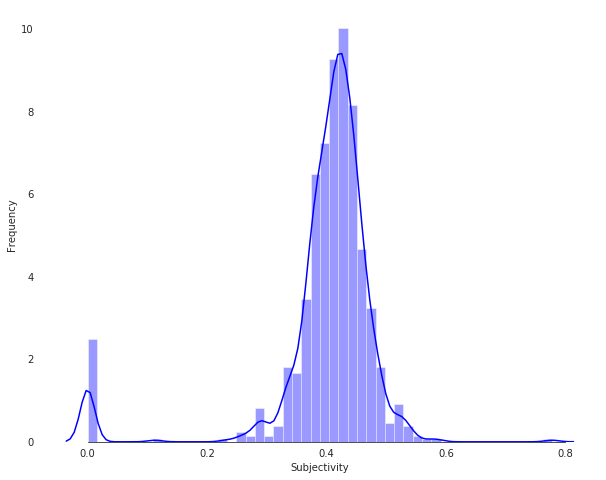

In [62]:
sns.set_style('white')
sns.set_palette('deep')
f, ax = plt.subplots(figsize=(10,8))
sns.distplot(data['subjectivity_scores'], color= 'b')
ax.xaxis.grid(False)
ax.set(ylabel='Frequency')
ax.set(xlabel='Subjectivity')
sns.despine(trim=True,left=True)
plt.show()

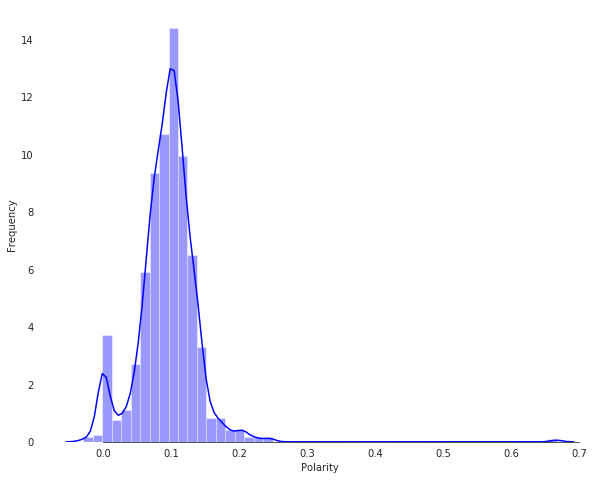

In [63]:
sns.set_style('white')
sns.set_palette('deep')
f, ax = plt.subplots(figsize=(10,8))
sns.distplot(data['polarity_scores'], color= 'b')
ax.xaxis.grid(False)
ax.set(ylabel='Frequency')
ax.set(xlabel='Polarity')
sns.despine(trim=True,left=True)
plt.show()

In [64]:
data.dtypes

coin                     object
text                     object
length                    int64
coin_id                  object
first_date               object
first_price             float64
latest_date [9/9/19]     object
latest_price            float64
price_change            float64
price_drop_true           int64
clean_text               object
clean_text_length         int64
clean_text2              object
readability             float64
clean_text3              object
day_diff                  int64
text_corpus              object
text_corpus_length        int64
hasLinkedIn               int64
hasBitcoin                int64
hasTeamInfo               int64
hasBlockchain             int64
hasContract               int64
hasUser                   int64
hasNode                   int64
polarity_scores         float64
subjectivity_scores     float64
dtype: object

In [65]:
data[(data.text_corpus_length >= 10000 ) & (data.price_drop_true == 0)]

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,readability,clean_text3,day_diff,text_corpus,text_corpus_length,hasLinkedIn,hasBitcoin,hasTeamInfo,hasBlockchain,hasContract,hasUser,hasNode,polarity_scores,subjectivity_scores
46,Ark,4/5/2019\n\nARK Ecosystem Whitepaper - Google ...,15587,ark,22/03/2017,0.033940,09/09/2019,0.224348,0.190407,0,"[4/5/2019, ARK, Ecosystem, Whitepaper, -, Goog...",15591,4/5/2019 ARK Ecosystem Whitepaper - Google Doc...,19.6,ark ecosystem whitepaper google doc ark ecosys...,901,"[ark, ecosystem, whitepaper, google, doc, ark,...",10768,1,1,1,1,1,1,1,0.100177,0.433244
340,GET Protocol,G U A R A N T E E D E N T R A N C E T O K E N\...,20919,get-token,12/01/2018,0.012581,08/09/2019,0.350175,0.337594,0,"[G, U, A, R, A, N, T, E, E, D, E, N, T, R, A, ...",20994,G U A R A N T E E D E N T R A N C E T O K E N ...,17.9,g u r n e e e n r n c e k e n smart event tick...,604,"[g, u, r, n, e, e, e, n, r, n, c, e, k, e, n, ...",11105,1,1,1,1,1,1,0,0.082534,0.467044
447,Komodo,"advanced blockchain technology, focused on fre...",39056,komodo,05/02/2017,0.115808,09/09/2019,0.734710,0.618902,0,"[advanced, blockchain, technology,, focused, o...",39179,"advanced blockchain technology, focused on fre...",15.9,advanced blockchain technology focused freedom...,946,"[advanced, blockchain, technology, focused, fr...",21407,0,1,1,1,1,1,1,0.091083,0.430995
629,Quant,\n\n \n\nQuant Overledger ® \nWhitepaper\t\n\...,19010,quant-network,30/06/2018,0.583714,09/09/2019,5.551451,4.967737,0,"[Quant, Overledger, ® , Whitepaper, Release, V...",19132,Quant Overledger ® Whitepaper Release V0.1 al...,13.8,quant overledger whitepaper release v alpha ja...,436,"[quant, overledger, whitepaper, release, v, al...",10680,0,1,1,1,1,1,1,0.056602,0.420425
650,Robotina,"INTERNET OF THINGS, ARTIFICIAL INTELLIGENCE \n...",23763,robotina,08/08/2018,0.020447,09/09/2019,0.051252,0.030805,0,"[INTERNET, OF, THINGS,, ARTIFICIAL, INTELLIGEN...",23870,"INTERNET OF THINGS, ARTIFICIAL INTELLIGENCE AN...",19.9,internet thing artificial intelligence blockch...,397,"[internet, thing, artificial, intelligence, bl...",14418,0,1,1,1,1,1,1,0.113431,0.446446
734,TEAM (TokenStars),\n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\nT...,17946,tokenstars-team,13/05/2018,0.000117,09/09/2019,0.020832,0.020714,0,"[TokenStars, Celebrity, Management, Platform, ...",18067,TokenStars Celebrity Management Platform on Bl...,18.2,tokenstars celebrity management platform block...,484,"[tokenstars, celebrity, management, platform, ...",10757,0,1,1,1,1,1,1,0.099475,0.384634
778,Ultiledger,Ultiledger.io Economic Eco Whitepaper\n\nThe n...,21831,ultiledger,10/11/2018,0.012721,09/09/2019,0.032057,0.019336,0,"[Ultiledger.io, Economic, Eco, Whitepaper, The...",21908,Ultiledger.io Economic Eco Whitepaper The next...,18.5,ultiledger io economic eco whitepaper next gen...,303,"[ultiledger, io, economic, eco, whitepaper, ne...",12669,0,1,1,1,1,1,1,0.102762,0.377545
779,Ultrain,Building a Programmable Business Society \n\n ...,20948,ultrain,22/11/2018,0.057683,09/09/2019,0.082562,0.024879,0,"[Building, a, Programmable, Business, Society,...",20984,Building a Programmable Business Society Ultra...,25.3,building programmable business society ultrain...,291,"[building, programmable, business, society, ul...",12461,1,1,1,1,1,1,1,0.077882,0.383012


In [66]:
data[data.subjectivity_scores >= 0.5]

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,readability,clean_text3,day_diff,text_corpus,text_corpus_length,hasLinkedIn,hasBitcoin,hasTeamInfo,hasBlockchain,hasContract,hasUser,hasNode,polarity_scores,subjectivity_scores
98,Bitcoin Rhodium,WHITEPAPER\n\n Limited - Rare - Resistant\n\nB...,1633,bitcoin-rhodium,01/02/2019,5.138751,09/09/2019,20.343213,15.204461,0,"[WHITEPAPER, Limited, -, Rare, -, Resistant, B...",1633,WHITEPAPER Limited - Rare - Resistant Bitcoin ...,19.7,whitepaper limited rare resistant bitcoin rhod...,220,"[whitepaper, limited, rare, resistant, bitcoin...",1091,0,1,1,1,0,1,0,0.099136,0.500765
112,Blakecoin,Introduction to Blakecoin\n\nWritten by Bzyzny...,1818,blakecoin,12/02/2014,0.066827,08/09/2019,0.001580,-0.065247,1,"[Introduction, to, Blakecoin, Written, by, Bzy...",1821,Introduction to Blakecoin Written by Bzyzny Fe...,13.9,introduction blakecoin written bzyzny february...,2034,"[introduction, blakecoin, written, bzyzny, feb...",1024,0,0,0,0,0,0,0,0.109275,0.514474
114,Block-Chain.com,Blockchain Airdrops \nOur Guiding Principles\n...,4628,block-chain-com,20/10/2018,0.162881,08/09/2019,0.006120,-0.156761,1,"[Blockchain, Airdrops, Our, Guiding, Principle...",4645,Blockchain Airdrops Our Guiding Principles Oct...,15.9,blockchain airdrop guiding principle october a...,323,"[blockchain, airdrop, guiding, principle, octo...",2638,0,1,0,1,1,1,1,0.085562,0.510365
115,Blocklancer,\n\n \n\n \n\n \n\nWhitepaper \n\nv0.5 \n\n \...,6476,blocklancer,29/03/2018,0.015456,08/09/2019,0.000227,-0.015229,1,"[Whitepaper, v0.5, 18., July, 2018, Whitepaper...",6492,Whitepaper v0.5 18. July 2018 Whitepaper V3 1....,13.9,whitepaper v july whitepaper v content content...,528,"[whitepaper, v, july, whitepaper, v, content, ...",3585,1,1,0,1,1,1,0,0.123475,0.518237
137,Bytecoin,CryptoNote v 2.0\n\nNicolas van Saberhagen\n\n...,7951,bytecoin,17/06/2014,0.000065,09/09/2019,0.000452,0.000387,0,"[CryptoNote, v, 2.0, Nicolas, van, Saberhagen,...",8098,CryptoNote v 2.0 Nicolas van Saberhagen Octobe...,13.1,cryptonote v nicolas van saberhagen october in...,1910,"[cryptonote, v, nicolas, van, saberhagen, octo...",4739,0,0,0,1,1,1,1,0.002817,0.524887
162,Civic,1\n\n Contents\n\n2\n\n 33\n\n 44\n\n 55\n\n 6...,42,civic,30/07/2017,0.163593,09/09/2019,0.040756,-0.122837,1,"[1, Contents, 2, 33, 44, 55, 66, 7, 8, 99, 101...",42,1 Contents 2 33 44 55 66 7 8 99 1010 1111 1212...,19.0,content rewarded token ideally rootstock subje...,771,"[content, rewarded, token, ideally, rootstock,...",13,0,1,0,0,0,0,0,0.244444,0.777778
342,Giant,\n\nGiant White Paper \n\nGiant White Paper\...,2066,giant,29/06/2018,0.881973,09/09/2019,0.024362,-0.857611,1,"[Giant, White, Paper, Giant, White, Paper, Gia...",2068,Giant White Paper Giant White Paper Giant Desi...,16.7,giant white paper giant white paper giant desi...,437,"[giant, white, paper, giant, white, paper, gia...",1237,0,1,1,1,1,0,1,0.091140,0.587008
371,Heartbout,Background\nOverview01. B\na\nc\nk\ng\nr\no\n...,5276,heartbout,31/12/2017,11.487586,09/09/2019,0.004987,-11.482599,1,"[Background, Overview01., B, a, c, k, g, r, o,...",5272,Background Overview01. B a c k g r o u n d T h...,16.3,background overview b c k g r u n h e n u b e ...,617,"[background, overview, b, c, k, g, r, u, n, h,...",2698,0,1,0,0,0,0,0,0.244444,0.514722
383,Honest,02\n\nHonest Paper\n\nImportant Notice\n\nPle...,5495,honest-mining,28/03/2019,0.024154,09/09/2019,0.008670,-0.015484,1,"[02, Honest, Paper, Important, Notice, Please,...",17924,02 Honest Paper Important Notice Please read t...,39.3,honest paper important notice please read sect...,165,"[honest, paper, important, notice, please, rea...",3228,1,1,1,1,1,0,1,0.222860,0.534332
406,Ignition,Ignition Coin and The Ignition Network \n\n \n...,1158,ignition,14/02/2018,10.488730,09/09/2019,0.147208,-10.341522,1,"[Ignition, Coin, and, The, Ignition, Network, ...",1163,Igni

In [67]:
data.drop(data[data['text_corpus_length']==0].index, inplace=True)
data.reset_index(drop=True, inplace= True)
data.shape

(824, 27)

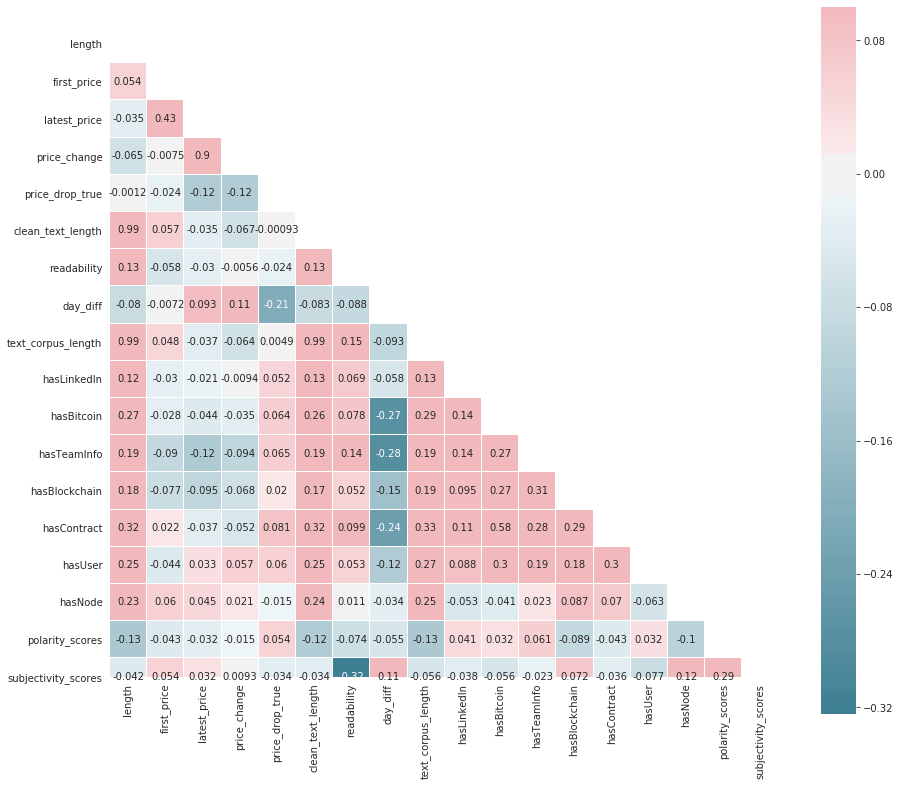

In [68]:
corr = data.corr()

mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize =(15,13))

cmap = sns.diverging_palette(220,10, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = cmap , vmax = .1 ,center =0, square=True, annot = True, linewidth = .1)

In [69]:
data[data['subjectivity_scores'] > 0.7]

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,readability,clean_text3,day_diff,text_corpus,text_corpus_length,hasLinkedIn,hasBitcoin,hasTeamInfo,hasBlockchain,hasContract,hasUser,hasNode,polarity_scores,subjectivity_scores
158,Civic,1\n\n Contents\n\n2\n\n 33\n\n 44\n\n 55\n\n 6...,42,civic,30/07/2017,0.163593,09/09/2019,0.040756,-0.122837,1,"[1, Contents, 2, 33, 44, 55, 66, 7, 8, 99, 101...",42,1 Contents 2 33 44 55 66 7 8 99 1010 1111 1212...,19.0,content rewarded token ideally rootstock subje...,771,"[content, rewarded, token, ideally, rootstock,...",13,0,1,0,0,0,0,0,0.244444,0.777778


In [0]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as esw

In [0]:
stopwords_cv = ['blockchain','user','data','time','use','block','chain'] + list(esw)

In [0]:
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='GnBu_d')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

In [0]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words= stopwords_cv)

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(data['clean_text3'])

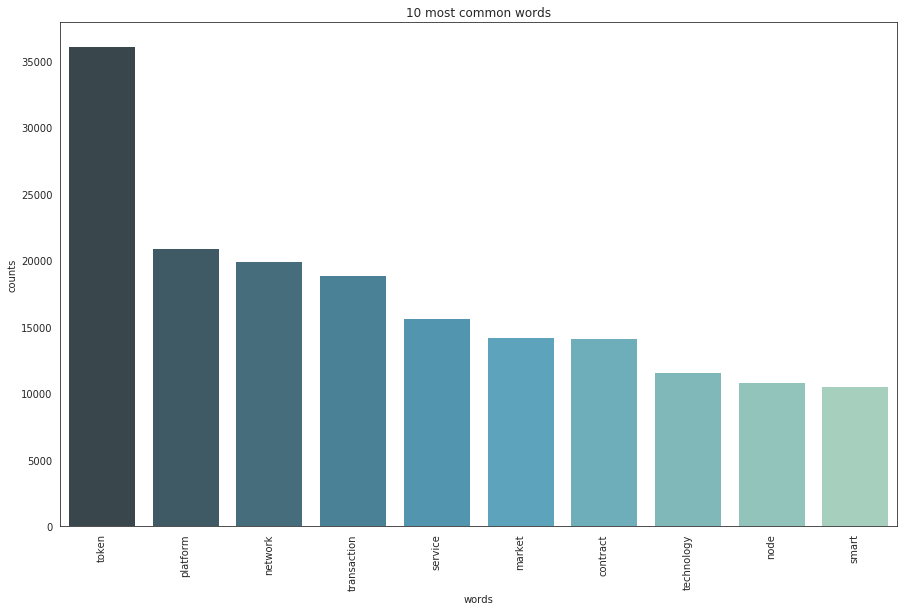

In [74]:
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [75]:
data['log_first_price'] = np.log1p(data['first_price'])
data['log_latest_price'] = np.log1p(data['latest_price'])
data['log_clean_text1'] = np.log1p(data['clean_text_length'])
data['log_clean_text2'] = np.log1p(data['text_corpus_length'])
data['log_day_diff'] = np.log1p(data['day_diff'])
data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,readability,clean_text3,day_diff,text_corpus,text_corpus_length,hasLinkedIn,hasBitcoin,hasTeamInfo,hasBlockchain,hasContract,hasUser,hasNode,polarity_scores,subjectivity_scores,log_first_price,log_latest_price,log_clean_text1,log_clean_text2,log_day_diff
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004,The 0Chain Consensus Protocol Jonathan Katz1 6...,14.0,chain consensus protocol jonathan katz thomas ...,417,"[chain, consensus, protocol, jonathan, katz, t...",2232,0,1,0,1,1,0,1,0.035793,0.483881,0.394286,0.036597,8.295299,7.711101,6.035481
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289,0x: An open protocol for decentralized exchang...,17.0,x open protocol decentralized exchange ethereu...,692,"[x, open, protocol, decentralized, exchange, e...",3036,0,1,0,1,1,1,1,0.076354,0.443694,0.199508,0.150013,8.573574,8.018625,6.541030
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1,"[0xcert, protocol, Whitepaper, 0.6, Authors:, ...",13605,0xcert protocol Whitepaper 0.6 Authors: Kristi...,17.9,xcert protocol whitepaper author kristijan sed...,424,"[xcert, protocol, whitepaper, author, kristija...",8034,1,1,1,1,1,1,1,0.114156,0.429502,0.042712,0.001058,9.518266,8.991562,6.052089
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1,"[General, Information, -, Whitepaper, as, of, ...",1340,General Information - Whitepaper as of July 20...,14.6,general information whitepaper july introducti...,193,"[general, information, whitepaper, july, intro...",760,0,1,1,1,0,1,0,0.117475,0.358987,1.908225,1.488595,7.201171,6.634633,5.267858
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1,"[Legal, Disclaimer, The, purpose, of, this, Wh...",10409,Legal Disclaimer The purpose of this White Pap...,28.4,legal disclaimer purpose white paper present w...,535,"[legal, disclaimer, purpose, white, paper, pre...",6470,0,1,1,1,1,1,1,0.122624,0.383026,0.250237,0.020458,9.250522,8.775086,6.284134


In [76]:
data['log_polarity'] = np.log1p(data['polarity_scores'])
data['log_subjectivity'] = np.log1p(data['subjectivity_scores'])
data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,readability,clean_text3,day_diff,text_corpus,text_corpus_length,hasLinkedIn,hasBitcoin,hasTeamInfo,hasBlockchain,hasContract,hasUser,hasNode,polarity_scores,subjectivity_scores,log_first_price,log_latest_price,log_clean_text1,log_clean_text2,log_day_diff,log_polarity,log_subjectivity
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004,The 0Chain Consensus Protocol Jonathan Katz1 6...,14.0,chain consensus protocol jonathan katz thomas ...,417,"[chain, consensus, protocol, jonathan, katz, t...",2232,0,1,0,1,1,0,1,0.035793,0.483881,0.394286,0.036597,8.295299,7.711101,6.035481,0.035167,0.394661
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289,0x: An open protocol for decentralized exchang...,17.0,x open protocol decentralized exchange ethereu...,692,"[x, open, protocol, decentralized, exchange, e...",3036,0,1,0,1,1,1,1,0.076354,0.443694,0.199508,0.150013,8.573574,8.018625,6.541030,0.073579,0.367205
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1,"[0xcert, protocol, Whitepaper, 0.6, Authors:, ...",13605,0xcert protocol Whitepaper 0.6 Authors: Kristi...,17.9,xcert protocol whitepaper author kristijan sed...,424,"[xcert, protocol, whitepaper, author, kristija...",8034,1,1,1,1,1,1,1,0.114156,0.429502,0.042712,0.001058,9.518266,8.991562,6.052089,0.108097,0.357326
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1,"[General, Information, -, Whitepaper, as, of, ...",1340,General Information - Whitepaper as of July 20...,14.6,general information whitepaper july introducti...,193,"[general, information, whitepaper, july, intro...",760,0,1,1,1,0,1,0,0.117475,0.358987,1.908225,1.488595,7.201171,6.634633,5.267858,0.111072,0.306740
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1,"[Legal, Disclaimer, The, purpose, of, this, Wh...",10409,Legal Disclaimer The purpose of this White Pap...,28.4,legal disclaimer purpose white paper present w...,535,"[legal, disclaimer, purpose, white, paper, pre...",6470,0,1,1,1,1,1,1,0.122624,0.383026,0.250237,0.020458,9.250522,8.775086,6.284134,0.115669,0.324274


(array([  7.,  96., 394., 242.,  58.,  16.,   4.,   0.,   4.,   3.]),
 array([ 6.7 , 10.56, 14.42, 18.28, 22.14, 26.  , 29.86, 33.72, 37.58,
        41.44, 45.3 ]),
 <a list of 10 Patch objects>)

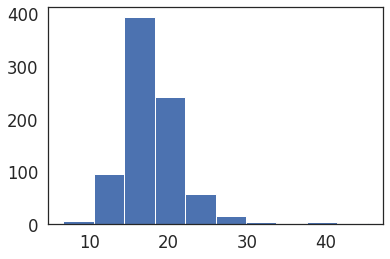

In [77]:
plt.hist(data['readability'])

In [84]:
data_v1 = data[['first_price','text_corpus_length','hasLinkedIn','hasBitcoin','hasTeamInfo','hasBlockchain','hasUser','hasContract','hasNode','log_first_price','log_clean_text2','price_change','price_drop_true','latest_price','log_latest_price','log_day_diff','readability','polarity_scores','log_polarity','subjectivity_scores','log_subjectivity']]

data_v1.head()

,first_price,text_corpus_length,hasLinkedIn,hasBitcoin,hasTeamInfo,hasBlockchain,hasUser,hasContract,hasNode,log_first_price,log_clean_text2,price_change,price_drop_true,latest_price,log_latest_price,log_day_diff,readability,polarity_scores,log_polarity,subjectivity_scores,log_subjectivity
0,0.483325,2232,0,1,0,1,0,1,1,0.394286,7.711101,-0.446050,1,0.037275,0.036597,6.035481,14.0,0.035793,0.035167,0.483881,0.394661
1,0.220802,3036,0,1,0,1,1,1,1,0.199508,8.018625,-0.058953,1,0.161849,0.150013,6.541030,17.0,0.076354,0.073579,0.443694,0.367205
2,0.043637,8034,1,1,1,1,1,1,1,0.042712,8.991562,-0.042578,1,0.001059,0.001058,6.052089,17.9,0.114156,0.108097,0.429502,0.357326
3,5.741111,760,0,1,1,1,1,0,0,1.908225,6.634633,-2.310245,1,3.430866,1.488595,5.267858,14.6,0.117475,0.111072,0.358987,0.306740
4,0.284330,6470,0,1,1,1,1,1,1,0.250237,8.775086,-0.263662,1,0.020668,0.020458,6.284134,28.4,0.122624,0.115669,0.383026,0.324274


In [0]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV,KFold, cross_val_score
from sklearn.linear_model import LogisticRegression, ElasticNet, ElasticNetCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import f1_score, auc, roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data['clean_text3'],data['price_drop_true'],random_state=0)

In [81]:
#Train and evaluate the model
vect = CountVectorizer().fit(X_train)
X_train_vectorized = vect.transform(X_train)
clfrNB = MultinomialNB(alpha= 0.5)
clfrNB.fit(X_train_vectorized, y_train)
y_pred = clfrNB.predict(vect.transform(X_test))
score = roc_auc_score(y_test, y_pred)

print(score)

0.6252678745373076


In [85]:
colnames = ['first_price','hasTeamInfo','hasBitcoin','hasContract','hasUser','hasNode','readability','log_day_diff','log_polarity']

x = data_v1[colnames]

x.head()

,first_price,hasTeamInfo,hasBitcoin,hasContract,hasUser,hasNode,readability,log_day_diff,log_polarity
0,0.483325,0,1,1,0,1,14.0,6.035481,0.035167
1,0.220802,0,1,1,1,1,17.0,6.541030,0.073579
2,0.043637,1,1,1,1,1,17.9,6.052089,0.108097
3,5.741111,1,1,0,1,0,14.6,5.267858,0.111072
4,0.284330,1,1,1,1,1,28.4,6.284134,0.115669


In [86]:
y = data_v1['price_drop_true']

y.head()

0    1
1    1
2    1
3    1
4    1
Name: price_drop_true, dtype: int64

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 1, stratify =y)

In [88]:
#establish baseline

random_list = np.random.randint(2, size = len(y_test))

random_list

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0])

In [0]:
from sklearn.metrics import confusion_matrix, classification_report

In [90]:
#establish baseline accuracy

print(f1_score(random_list,y_test))
print(confusion_matrix(random_list,y_test))

0.6181818181818182
[[13 70]
 [14 68]]


In [91]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
lr_pred = lr.predict(x_test)
lr_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [93]:
print(classification_report(lr_pred, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.99      0.84      0.91       164

    accuracy                           0.83       165
   macro avg       0.50      0.42      0.45       165
weighted avg       0.99      0.83      0.90       165



In [0]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [96]:
rf_pred = rf.predict(x_test)
rf_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [97]:
f1_score(rf_pred, y_test)

0.9278350515463919

In [98]:
confusion_matrix(rf_pred,y_test)

array([[  9,   3],
       [ 18, 135]])

In [99]:
print(classification_report(rf_pred,y_test))

              precision    recall  f1-score   support

           0       0.33      0.75      0.46        12
           1       0.98      0.88      0.93       153

    accuracy                           0.87       165
   macro avg       0.66      0.82      0.69       165
weighted avg       0.93      0.87      0.89       165



In [0]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [102]:
dt_pred = dt.predict(x_test)
dt_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [103]:
print(classification_report(dt_pred, y_test))

              precision    recall  f1-score   support

           0       0.41      0.38      0.39        29
           1       0.87      0.88      0.88       136

    accuracy                           0.79       165
   macro avg       0.64      0.63      0.63       165
weighted avg       0.79      0.79      0.79       165



In [0]:
from xgboost import XGBClassifier

In [105]:
 xgb = XGBClassifier()
 xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [106]:
xgb_pred = xgb.predict(x_test)
xgb_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [107]:
print(classification_report(xgb_pred, y_test))

              precision    recall  f1-score   support

           0       0.22      0.67      0.33         9
           1       0.98      0.87      0.92       156

    accuracy                           0.85       165
   macro avg       0.60      0.77      0.63       165
weighted avg       0.94      0.85      0.89       165



In [108]:
xgb.feature_importances_

array([0.11772777, 0.17741112, 0.09764449, 0.07543437, 0.11605389,
       0.05615038, 0.0900978 , 0.17371781, 0.09576236], dtype=float32)

In [109]:
xgb_auc = roc_auc_score(y_test , xgb_pred)
print('AUC: %.3f' % xgb_auc)

AUC: 0.600


In [0]:
fpr, tpr , thresholds = roc_curve(y_test, xgb_pred)

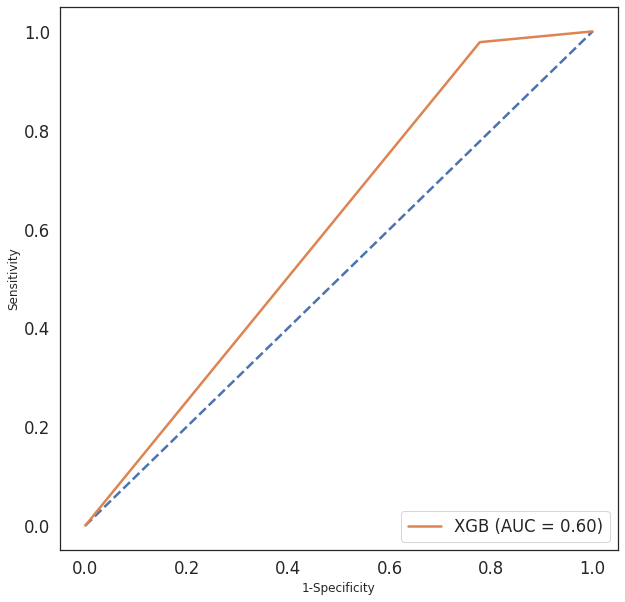

In [111]:
fpr, tpr , thresholds = roc_curve(y_test, xgb_pred)
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr, label='XGB (AUC = %0.2f)'% xgb_auc)
plt.xlabel("1-Specificity",fontsize=12)
plt.ylabel("Sensitivity",fontsize=12)
plt.legend(loc='lower right')
plt.show()

In [0]:
#Gensim for topic modelling
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec, CoherenceModel, LdaModel, LsiModel
from pprint import pprint

In [0]:
model = Word2Vec(size = 300, window = 10, min_count = 200, sg =0,iter=10)
model.build_vocab(data['text_corpus'])

In [123]:
model.wv.vocab.keys()

dict_keys(['chain', 'consensus', 'protocol', 'computer', 'science', 'university', 'llc', 'state', 'abstract', 'describe', 'blockchain', 'ecosystem', 'including', 'new', 'fast', 'provide', 'proof', 'security', 'along', 'experiment', 'result', 'e', 'ciency', 'network', 'condition', 'introduction', 'since', 'bitcoin', 'world', 'cryptocurrencies', 'distributed', 'computation', 'ethereum', 'de', 'promise', 'integrating', 'turing', 'complete', 'smart', 'contract', 'building', 'application', 'dapps', 'despite', 'held', 'back', 'slow', 'time', 'example', 'transaction', 'con', 'six', 'block', 'deep', 'process', 'take', 'one', 'hour', 'address', 'limitation', 'introducing', 'algorithm', 'faster', 'us', 'via', 'veri', 'able', 'random', 'function', 'ranking', 'di', 'erent', 'pro', 'designer', 'also', 'introduce', 'concept', 'notary', 'sign', 'highest', 'round', 'author', 'case', 'unique', 'soon', 'accepted', 'part', 'miner', 'prevents', 'mining', 'nothing', 'stake', 'problem', 'er', 'free', 'platf

In [124]:
model.wv['blockchain']

array([ 1.12006918e-03,  1.81686803e-04,  1.59375987e-03,  3.81302343e-05,
       -8.52675585e-04, -9.59067547e-04,  2.90721044e-04, -1.20684609e-03,
        1.66292291e-03, -1.33897946e-03, -5.50381665e-04, -1.78870556e-04,
        9.61586775e-04, -2.30874561e-04,  1.56024948e-03, -7.12655368e-04,
       -1.31784775e-03,  3.38865910e-04,  1.33794104e-03, -3.47367692e-04,
        8.76618491e-04,  1.29466772e-03, -1.21200259e-03,  9.41133621e-05,
       -1.33352366e-03,  1.52268636e-04, -3.56380304e-04, -1.49191404e-03,
       -1.09175267e-03,  4.42491350e-04,  6.27092595e-05, -6.26257912e-04,
       -4.82665171e-04, -2.60057772e-04, -1.20592071e-03,  2.09492166e-04,
       -1.28122349e-03, -1.33987993e-03, -1.32271566e-03,  1.25674112e-03,
       -1.12107384e-03,  1.49672886e-03, -5.20779984e-04,  7.75394146e-04,
       -1.33523997e-03, -8.44918715e-04,  1.14378694e-03,  4.85681201e-04,
       -4.25758772e-04,  3.58566962e-04, -1.67174134e-04, -1.35518634e-03,
       -1.15784921e-03,  

In [0]:
from sklearn.manifold import TSNE

In [0]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=10, n_components=2, init='pca', n_iter=3500, random_state=100)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

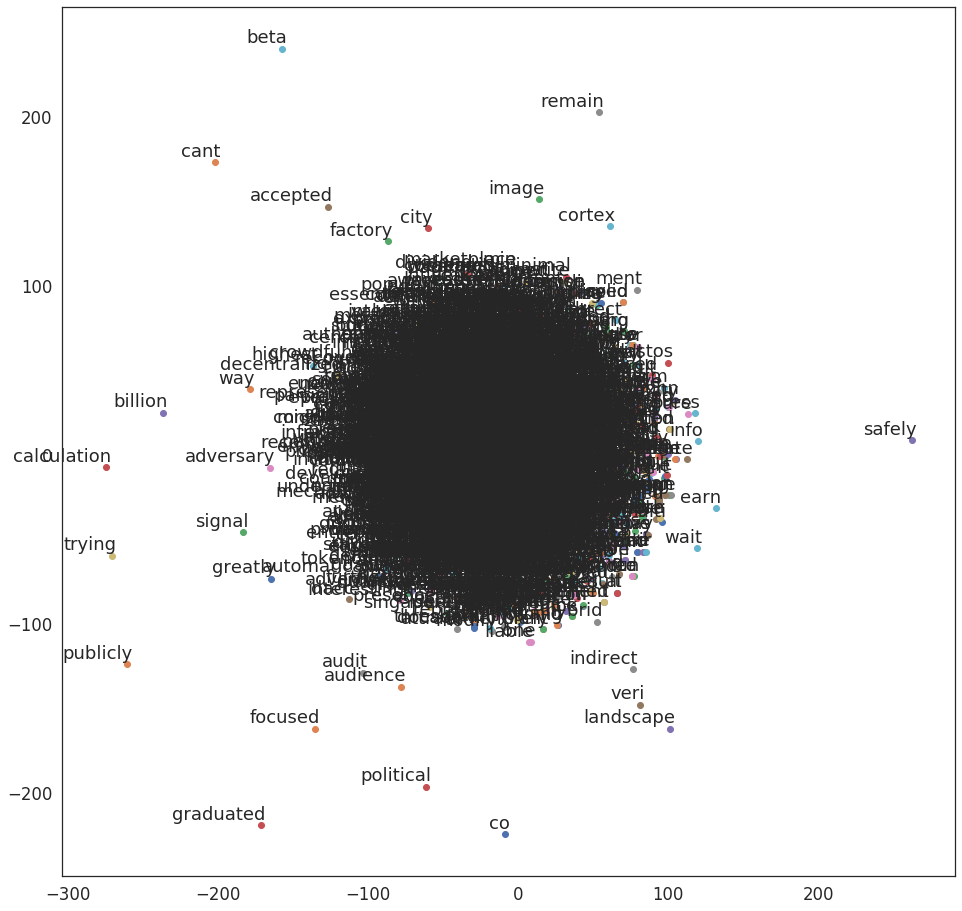

In [125]:
import warnings
warnings.simplefilter('ignore')
tsne_plot(model)

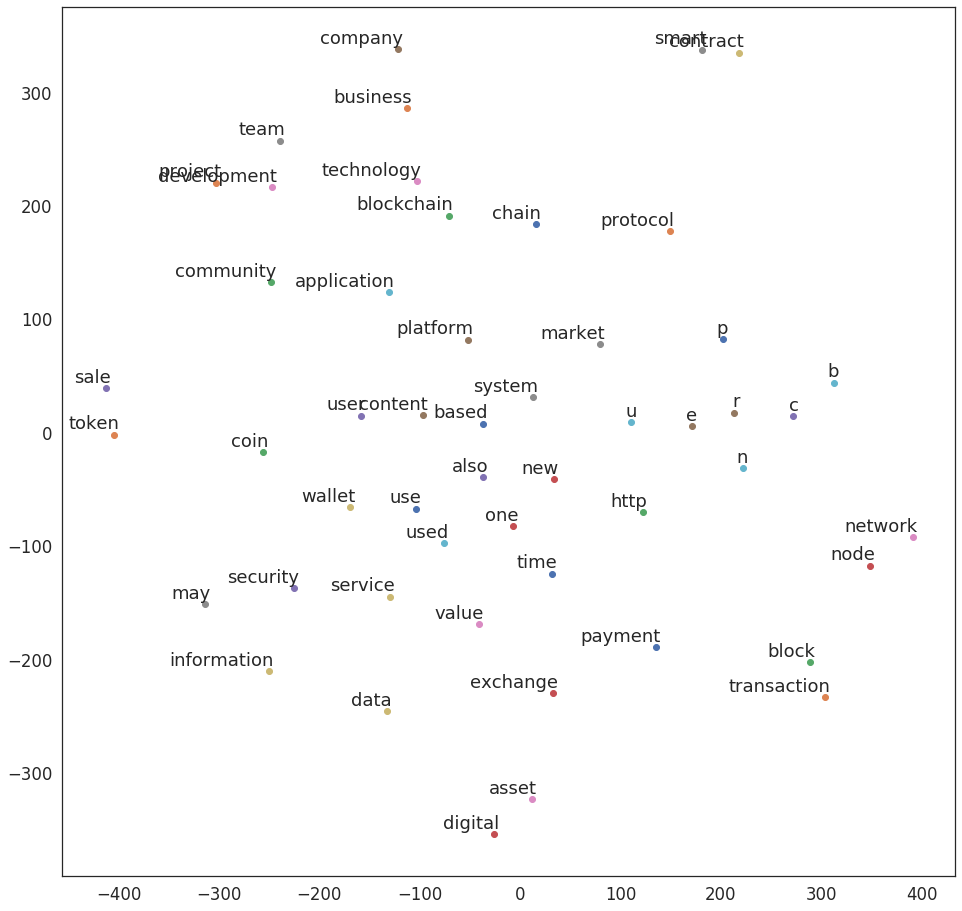

In [126]:
# A more selective model
model = Word2Vec(list_words,size=300, window=20, min_count=7000, workers=4)
tsne_plot(model)

In [127]:
model.corpus_count

884

In [128]:
model.wv.most_similar('blockchain')

[('technology', 0.6829919219017029),
 ('application', 0.34037575125694275),
 ('digital', 0.27011042833328247),
 ('transaction', 0.2546430230140686),
 ('chain', 0.2512694001197815),
 ('based', 0.21116358041763306),
 ('smart', 0.21091319620609283),
 ('business', 0.19700807332992554),
 ('project', 0.17681637406349182),
 ('development', 0.1453419178724289)]

In [129]:
model.wv.most_similar('token')

[('sale', 0.6125073432922363),
 ('may', 0.32784101366996765),
 ('used', 0.28694242238998413),
 ('platform', 0.24125143885612488),
 ('exchange', 0.23823870718479156),
 ('contract', 0.20426377654075623),
 ('wallet', 0.20423221588134766),
 ('use', 0.1637427806854248),
 ('value', 0.15198911726474762),
 ('project', 0.12096326798200607)]

In [130]:
model.wv.most_similar('r')

[('e', 0.8471503257751465),
 ('n', 0.8325018882751465),
 ('c', 0.6450512409210205),
 ('u', 0.41092967987060547),
 ('p', 0.38633015751838684),
 ('b', 0.32179954648017883),
 ('block', 0.10374140739440918),
 ('protocol', 0.0921546220779419),
 ('http', 0.058167919516563416),
 ('node', 0.029968569055199623)]

In [0]:
from gensim.parsing.preprocessing import STOPWORDS

In [0]:
dictionary = gensim.corpora.Dictionary(list_words)

In [142]:
#Filter out words that occur less than 400 whitepapers
dictionary.filter_extremes(no_below=400,no_above=0.6)
print('Total Vocabulary Size:', len(dictionary))

Total Vocabulary Size: 269


In [143]:
#Transforming corpus into bag of words vectors

bow_corpus = [dictionary.doc2bow(doc) for doc in list_words]
print(bow_corpus[:1])

[[(0, 1), (1, 4), (2, 1), (3, 33), (4, 1), (5, 1), (6, 3), (7, 1), (8, 1), (9, 4), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 26), (16, 1), (17, 1), (18, 1), (19, 2), (20, 17), (21, 2), (22, 1), (23, 1), (24, 3), (25, 2), (26, 2), (27, 2), (28, 3), (29, 1), (30, 3), (31, 3), (32, 4), (33, 4), (34, 1), (35, 2), (36, 2), (37, 1), (38, 2), (39, 2), (40, 2), (41, 1), (42, 1), (43, 3), (44, 1), (45, 7), (46, 2), (47, 1), (48, 1), (49, 1), (50, 2), (51, 8), (52, 1), (53, 1), (54, 1), (55, 2), (56, 2), (57, 2), (58, 1), (59, 45), (60, 1), (61, 2), (62, 4), (63, 2), (64, 1), (65, 1), (66, 5), (67, 3), (68, 1), (69, 5), (70, 2), (71, 1), (72, 3), (73, 2), (74, 2), (75, 2), (76, 2), (77, 15), (78, 6), (79, 2), (80, 2), (81, 3), (82, 1), (83, 1), (84, 1)]]


In [144]:
# Human readable format of corpus (term-frequency)
print([[(dictionary[id], freq) for id, freq in cp] for cp in bow_corpus[:1]])

[[('across', 1), ('act', 4), ('action', 1), ('active', 33), ('added', 1), ('always', 1), ('among', 3), ('analysis', 1), ('anyone', 1), ('approach', 4), ('architecture', 1), ('basis', 1), ('becomes', 1), ('building', 1), ('called', 1), ('client', 26), ('communication', 1), ('computer', 1), ('concept', 1), ('condition', 2), ('consensus', 17), ('considered', 2), ('continue', 1), ('cryptocurrencies', 1), ('document', 3), ('done', 2), ('either', 2), ('entire', 2), ('entity', 3), ('expected', 1), ('fact', 3), ('fast', 3), ('follows', 4), ('g', 4), ('generated', 1), ('generation', 2), ('held', 2), ('higher', 1), ('history', 2), ('hold', 2), ('holding', 2), ('implement', 1), ('implementation', 1), ('includes', 3), ('independent', 1), ('instead', 7), ('issued', 2), ('keep', 1), ('later', 1), ('ledger', 1), ('lower', 2), ('mining', 8), ('name', 1), ('needed', 1), ('node', 1), ('particular', 2), ('peer', 2), ('present', 2), ('quickly', 1), ('r', 45), ('rather', 1), ('reach', 2), ('received', 4), 

In [145]:
print('Total number of whitepapers:', len(bow_corpus))

Total number of whitepapers: 884


In [0]:
lda_model = gensim.models.ldamodel.LdaModel(corpus = bow_corpus, id2word = dictionary, num_topics = 15, random_state =100, update_every = 1,
                                            chunksize=200,passes=10,alpha='auto',per_word_topics=True)

In [147]:
pprint(lda_model.print_topics())

[(0,
  '0.037*"social" + 0.025*"revenue" + 0.020*"investor" + 0.019*"partner" + '
  '0.016*"founder" + 0.016*"opportunity" + 0.014*"billion" + 0.014*"quality" + '
  '0.014*"strategy" + 0.014*"advisor"'),
 (1,
  '0.129*"whitepaper" + 0.043*"legal" + 0.035*"person" + 0.030*"law" + '
  '0.025*"loss" + 0.022*"document" + 0.022*"entity" + 0.021*"condition" + '
  '0.021*"provider" + 0.016*"regulation"'),
 (2,
  '0.047*"participant" + 0.041*"economy" + 0.028*"economic" + '
  '0.023*"organization" + 0.021*"decision" + 0.021*"channel" + 0.020*"action" '
  '+ 0.015*"incentive" + 0.014*"capital" + 0.011*"condition"'),
 (3,
  '0.073*"client" + 0.038*"stake" + 0.036*"document" + 0.022*"utility" + '
  '0.019*"api" + 0.017*"peer" + 0.016*"release" + 0.016*"simple" + '
  '0.015*"want" + 0.013*"benefit"'),
 (4,
  '0.085*"io" + 0.077*"mobile" + 0.074*"app" + 0.035*"web" + 0.031*"internet" '
  '+ 0.019*"server" + 0.019*"interface" + 0.019*"api" + 0.018*"eth" + '
  '0.018*"co"'),
 (5,
  '0.471*"r" + 0.349

In [148]:
# Compute Perplexity
print('\nPerplexity:', lda_model.log_perplexity(bow_corpus))

# Compute Coherence Score
coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, texts = list_words, dictionary = dictionary, coherence = 'c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score:', coherence_lda)


Perplexity: -5.185770808457444

Coherence Score: 0.3611010878900481


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data['clean_text3'],data['hasNode'], test_size=0.2, random_state=100)

In [0]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [156]:
lm = LogisticRegression()
lm.fit(X_train, y_train)
score = lm.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.7454545454545455


In [153]:
data[(data.text_corpus_length >= 12000) & (data.price_change < -0.5)]

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,readability,clean_text3,day_diff,text_corpus,text_corpus_length,hasLinkedIn,hasBitcoin,hasTeamInfo,hasBlockchain,hasContract,hasUser,hasNode,polarity_scores,subjectivity_scores,log_first_price,log_latest_price,log_clean_text1,log_clean_text2,log_day_diff,log_polarity,log_subjectivity
175,Cortex,Cortex - AI on Blockchain\n\nThe Decentralized...,23188,cortex,18/04/2018,1.007668,09/09/2019,0.083713,-0.923955,1,"[Cortex, -, AI, on, Blockchain, The, Decentral...",23280,Cortex - AI on Blockchain The Decentralized AI...,20.1,cortex ai blockchain decentralized ai autonomo...,509,"[cortex, ai, blockchain, decentralized, ai, au...",13192,0,1,1,1,1,0,1,0.089610,0.386273,0.696974,0.080393,10.055393,9.487442,6.234411,0.085820,0.326619
485,MGC Token,MGC Token White Paper\nCreate a borderless bl...,20195,mgc-token,26/05/2019,0.851559,09/09/2019,0.054583,-0.796975,1,"[MGC, Token, White, Paper, Create, a, borderle...",20263,MGC Token White Paper Create a borderless bloc...,21.6,mgc token white paper create borderless blockc...,106,"[mgc, token, white, paper, create, borderless,...",12502,0,1,1,1,1,1,1,0.099615,0.379279,0.616028,0.053146,9.916601,9.433724,4.672829,0.094960,0.321561
665,SingularityNET,\n\n \n\n \n\n \n\n \n\nSingularityNET \n\nA...,31758,singularitynet,22/01/2018,0.892969,09/09/2019,0.027701,-0.865269,1,"[SingularityNET, A, Decentralized,, Open, Mark...",31924,"SingularityNET A Decentralized, Open Market an...",20.3,singularitynet decentralized open market netwo...,595,"[singularitynet, decentralized, open, market, ...",19029,0,1,1,1,1,1,1,0.077179,0.418519,0.638147,0.027324,10.371145,9.853772,6.390241,0.074345,0.349613
811,Zcash,Zerocash: Decentralized Anonymous Payments fro...,34026,zcash,29/10/2016,3191.930000,09/09/2019,48.290730,-3143.639270,1,"[Zerocash:, Decentralized, Anonymous, Payments...",35148,Zerocash: Decentralized Anonymous Payments fro...,14.5,zerocash decentralized anonymous payment bitco...,1045,"[zerocash, decentralized, anonymous, payment, ...",19167,0,0,0,0,1,0,1,0.015025,0.449701,8.068694,3.897736,10.467351,9.860998,6.952729,0.014913,0.371358


(array([  4.,  20., 655.,  34.,   7.,   3.,   1.,   0.,   1.,   2.]),
 array([-3.89662187, -2.58370713, -1.27079239,  0.04212236,  1.3550371 ,
         2.66795184,  3.98086658,  5.29378132,  6.60669606,  7.9196108 ,
         9.23252555]),
 <a list of 10 Patch objects>)

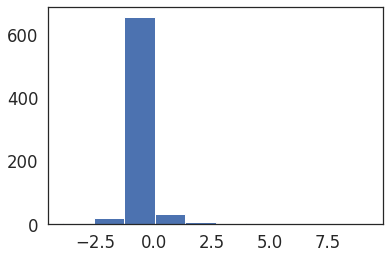

In [157]:
plt.hist(np.log1p(data['price_change']))

In [158]:
data['clean_text3'][420]

'jewel global diamond commodity exchange white paper transforming jewel new financial asset class introduction market review jewellery market project basis diamond market status quo blockchain project standard transparency jedex digital diamond certificate jedex trading category joint investment short sale functional non functional requirement jewel jewel finance feature jewel finance market trend prospect team partner jewel jewel roadmap conclusion introduction jewel made dispense limit exemplary trading market digital currency market view three stage jewel enables play wide range budgetary exchange fiat cash digital money change fiat cash crypto coin way around still introduces specific trouble way customary market everyday turnover trillion u dollar multi billion crypto advertise yet isolated one another manner trouble made fiat holder advanced resource undertaking enables financial specialist deal fund stage spare issue beneath portray detail item vision task subtlety approach actu

In [159]:
data[data.readability >= 30.0]

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,readability,clean_text3,day_diff,text_corpus,text_corpus_length,hasLinkedIn,hasBitcoin,hasTeamInfo,hasBlockchain,hasContract,hasUser,hasNode,polarity_scores,subjectivity_scores,log_first_price,log_latest_price,log_clean_text1,log_clean_text2,log_day_diff,log_polarity,log_subjectivity
8,ACE (TokenStars),TokenStars Company\n\nWhite Paper\n\ntokenizin...,14271,tokenstars-ace,28/12/2017,0.817860,09/09/2019,0.036565,-0.781295,1,"[TokenStars, Company, White, Paper, tokenizing...",3658,TokenStars Company White Paper tokenizing cele...,45.3,tokenstars company white paper tokenizing cele...,620,"[tokenstars, company, white, paper, tokenizing...",8673,0,1,1,1,1,0,0,0.082994,0.381593,0.597660,0.035912,8.204945,9.068085,6.431331,0.079730,0.323237
10,Achain,\n\nAchain 블록체인 Whitepaper \n\nBuild to be bo...,3962,achain,14/11/2017,0.107318,09/09/2019,0.007289,-0.100028,1,"[Achain, 블록체인, Whitepaper, Build, to, be, boun...",4017,Achain 블록체인 Whitepaper Build to be boundless 목...,30.0,achain whitepaper build boundless achain smart...,664,"[achain, whitepaper, build, boundless, achain,...",452,0,0,1,1,1,0,0,0.000052,0.357402,0.101940,0.007263,8.298540,6.115892,6.499787,0.000052,0.305572
149,Ccore,CW\n\nc\no\nr\ne\nh\ni\nt\ne\np\na\np\ne\nr\nC...,5699,ccore,09/12/2017,1.432403,08/09/2019,0.010559,-1.421844,1,"[CW, c, o, r, e, h, i, t, e, p, a, p, e, r, C,...",5683,CW c o r e h i t e p a p e r C o p y r i g h t...,38.9,cw c r e h e p p e r c p r g h p l f r c n c e...,638,"[cw, c, r, e, h, e, p, p, e, r, c, p, r, g, h,...",3086,0,0,0,0,0,0,0,0.000000,0.000000,0.888880,0.010504,8.645410,8.034955,6.459904,0.000000,0.000000
185,Crypto Sports,Whitepaper\n\n1.0\n\n Blockchain Ven...,49,crypto-sports,26/02/2019,0.037911,09/09/2019,0.094435,0.056524,0,"[Whitepaper, 1.0, Blockchain, Venture, Capital...",49,Whitepaper 1.0 Blockchain Venture Capital Fund...,42.1,whitepaper blockchain venture capital funding ...,195,"[whitepaper, blockchain, venture, capital, fun...",32,0,0,0,1,0,0,0,0.000000,0.000000,0.037210,0.090238,3.912023,3.496508,5.278115,0.000000,0.000000
246,eBoost,WHITEPAPER | EBOOST\n\nEBOOST.FUN \n\n T A B L...,29040,eboost,14/11/2017,0.096307,09/09/2019,0.007007,-0.089300,1,"[WHITEPAPER, |, EBOOST, EBOOST.FUN, T, A, B, L...",29025,WHITEPAPER | EBOOST EBOOST.FUN T A B L E O F C...,32.9,whitepaper eboost eboost fun b l e f content t...,664,"[whitepaper, eboost, eboost, fun, b, l, e, f, ...",14738,0,1,1,1,1,0,0,0.108636,0.292415,0.091947,0.006982,10.275947,9.598252,6.499787,0.103131,0.256513
337,GoldenFever,2019Golden FeverWhitepaper C\no\nn\nt\ne\nn\nt...,18954,goldenfever,05/03/2019,7.437488,08/09/2019,0.000735,-7.436753,1,"[2019Golden, FeverWhitepaper, C, o, n, t, e, n...",18950,2019Golden FeverWhitepaper C o n t e n t s : 0...,44.8,golden feverwhitepaper c n e n c n e n g l e n...,187,"[golden, feverwhitepaper, c, n, e, n, c, n, e,...",9321,0,0,1,0,0,0,0,0.024646,0.328081,2.132685,0.000735,9.849612,9.140132,5.236442,0.024348,0.283735
368,Honest,02\n\nHonest Paper\n\nImportant Notice\n\nPle...,5495,honest-mining,28/03/2019,0.024154,09/09/2019,0.008670,-0.015484,1,"[02, Honest, Paper, Important, Notice, Please,...",17924,02 Honest Paper Important Notice Please read t...,39.3,honest paper important notice please read sect...,165,"[honest, paper, important, notice, please, rea...",3228,1,1,1,1,1,0,1,0.222860,0.534332,0.023867,0.008633,9.793952,8.079928,5.111988,0.201193,0.428095
544,OLXA,\n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\nOLXA C...,2767,olxa,13/03/2019,0.000027,09/09/2019,0.001817,0.001790,0,"[OLXA, COIN, WHITE, PAPER, DECENTRALIZED, APPL...",2767,OLXA COIN WHITE PAPER DECENTRALIZED APPLICATIO...,37.6,olxa coin white paper decentralized applicatio...,180,"[olxa, coin, white, paper, decentralized, appl...",1636,0,1,1,1,1,1,1,0.154026,0.401144,0.000027,0.001815,7.925880,7.400621,5.198497,0.143256,0

In [162]:
print(data['text_corpus'][149])

['cw', 'c', 'r', 'e', 'h', 'e', 'p', 'p', 'e', 'r', 'c', 'p', 'r', 'g', 'h', 'p', 'l', 'f', 'r', 'c', 'n', 'c', 'e', 'p', 'n', 'p', 'e', 'c', 'u', 'l', 'r', 'e', 'f', 'c', 'c', 'r', 'e', 'w', 'h', 'c', 'c', 'r', 'e', 'r', 'u', 'c', 'u', 'r', 'e', 'f', 'c', 'c', 'r', 'e', 'h', 'w', 'e', 'c', 'c', 'r', 'e', 'w', 'r', 'k', 'w', 'h', 'p', 'r', 'b', 'l', 'e', 'c', 'n', 'l', 'v', 'e', 'c', 'c', 'r', 'e', 'w', 'h', 'p', 'r', 'b', 'l', 'e', 'r', 'e', 'h', 'e', 'r', 'e', 'h', 'w', 'c', 'n', 'w', 'e', 'l', 'v', 'e', 'u', 'c', 'h', 'p', 'r', 'b', 'l', 'e', 'c', 'c', 'r', 'e', 'k', 'e', 'n', 'c', 'c', 'r', 'p', 'n', 'r', 'u', 'c', 'n', 'l', 'f', 'e', 'h', 'p', 'e', 'n', 'c', 'e', 'c', 'r', 'e', 'n', 'f', 'h', 'e', 'f', 'r', 'b', 'c', 'n', 'c', 'r', 'p', 'c', 'u', 'r', 'r', 'e', 'n', 'c', 'c', 'r', 'p', 'f', 'n', 'n', 'c', 'l', 'e', 'n', 'h', 'u', 'h', 'v', 'e', 'n', 'e', 'g', 'r', 'e', 'j', 'b', 'c', 'r', 'e', 'e', 'n', 'p', 'r', 'n', 'p', 'r', 'j', 'e', 'c', 'w', 'h', 'c', 'h', 'l', 'e', 'g', 'r'

In [0]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    lda_model = gensim.models.LdaMulticore(corpus=bow_corpus,
                                           id2word=dictionary,
                                           num_topics=10, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b,
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts= list_words, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [0]:
def evaluate_graph(dictionary, corpus, texts, limit):
    """
    Function to display num_topics - LDA graph using c_v coherence
    
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : topic limit
    
    Returns:
    -------
    lm_list : List of LDA topic models
    c_v : Coherence values corresponding to the LDA model with respective number of topics
    """
    c_v = []
    lm_list = []
    for num_topics in range(1, limit):
        lm = LdaModel(corpus= bow_corpus, num_topics=num_topics, id2word=dictionary)
        lm_list.append(lm)
        cm = CoherenceModel(model=lm, texts=list_words, dictionary=dictionary, coherence='c_v')
        c_v.append(cm.get_coherence())
        
    # Show graph
    x = range(1, limit)
    plt.plot(x, c_v)
    plt.xlabel("num_topics")
    plt.ylabel("Coherence score")
    plt.legend(("c_v"), loc='best')
    plt.show()
    
    return lm_list, c_v

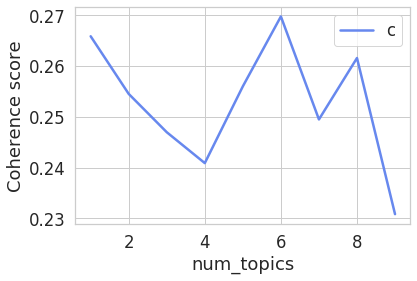

CPU times: user 7min 25s, sys: 46.7 ms, total: 7min 25s
Wall time: 7min 26s


In [0]:
%%time
lmlist, c_v = evaluate_graph(dictionary=dictionary, corpus=bow_corpus, texts=list_words, limit=10)

In [0]:
data = data.to_json(r'datav1.json',orient='columns')

##LSI Model (Alternative form LSA model)

In [0]:
lsi_model = LsiModel(corpus = bow_corpus, num_topics = 10, id2word = dictionary)

In [0]:
lsi_model.show_topics(num_topics=20)

[(0,
  '0.889*"r" + 0.383*"p" + 0.246*"g" + 0.030*"x" + 0.011*"node" + 0.004*"whitepaper" + 0.004*"consensus" + 0.003*"white" + 0.003*"storage" + 0.002*"trading"'),
 (1,
  '0.605*"node" + 0.197*"consensus" + 0.142*"whitepaper" + 0.131*"foundation" + 0.120*"storage" + 0.117*"trading" + 0.116*"internet" + 0.113*"provider" + 0.112*"customer" + 0.103*"client"'),
 (2,
  '-0.691*"node" + 0.182*"trading" + 0.180*"customer" + 0.167*"whitepaper" + -0.163*"consensus" + 0.155*"consumer" + 0.116*"provider" + 0.113*"mobile" + 0.109*"foundation" + 0.106*"white"'),
 (3,
  '-0.382*"g" + -0.357*"consumer" + 0.338*"trading" + 0.336*"foundation" + -0.309*"p" + 0.270*"whitepaper" + -0.269*"x" + 0.246*"r" + -0.179*"personal" + -0.157*"customer"'),
 (4,
  '0.445*"p" + 0.393*"g" + -0.387*"consumer" + 0.329*"trading" + -0.300*"r" + -0.230*"customer" + 0.201*"whitepaper" + -0.201*"personal" + -0.142*"foundation" + -0.110*"internet"'),
 (5,
  '-0.551*"trading" + 0.417*"foundation" + 0.305*"whitepaper" + 0.296*"

In [0]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 8.9MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=580339d83da6667f90b804688113ea21a0b0afb7b9a73e9fb6c5b4de36f40a26
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [0]:
import pyLDAvis
import pyLDAvis.gensim

In [0]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model,bow_corpus,dictionary)
vis

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
2     -0.076106  0.110020       1        1  9.919282
16    -0.059072 -0.014888       2        1  9.315466
9     -0.034177  0.064742       3        1  8.374114
6     -0.062344 -0.006946       4        1  7.383963
4     -0.055609  0.109516       5        1  6.204813
19     0.014342 -0.185430       6        1  5.757124
17     0.071746 -0.159511       7        1  5.413088
18     0.581570  0.074372       8        1  5.146082
3     -0.029736 -0.098958       9        1  5.133279
15    -0.057650  0.010220      10        1  4.479918
5     -0.050516  0.003284      11        1  4.258286
12    -0.051911  0.066237      12        1  4.250834
10    -0.040873 -0.068569      13        1  4.146691
13    -0.031130  0.017072      14        1  3.499559
1      0.026709 -0.151264      15        1  3.408979
8     -0.008895 -0.079704      16        1  3.145670
14    -0.043298  0.113317      17        1  2.934719
11    -0.024452 -0.062760      18        1  2.716413
0     -0.042498  0.081515      19        1  2.672719
7     -0.026099  0.177735      20        1  1.839006, topic_info=    Category          Freq         Term         Total  loglift  logprob
121  Default  12136.000000            n  12136.000000  30.0000  30.0000
149  Default  11167.000000            r  11167.000000  29.0000  29.0000
126  Default  10327.000000         node  10327.000000  28.0000  28.0000
824  Default   6847.000000            l   6847.000000  27.0000  27.0000
79   Default   6435.000000            h   6435.000000  26.0000  26.0000
..       ...           ...          ...           ...      ...      ...
613  Topic20     75.080421  participate   1640.470215   0.9118  -5.5182
483  Topic20     75.419716      develop   1725.292847   0.8659  -5.5137
444  Topic20     75.626678         card   1995.029785   0.7233  -5.5110
311  Topic20     75.123482           io   2741.198486   0.3989  -5.5177
615  Topic20     71.525002      partner   2670.747314   0.3759  -5.5667

[882 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         1  0.001508  abstract
0         2  0.173370  abstract
0         3  0.012061  abstract
0         4  0.060303  abstract
0         5  0.019598  abstract
...     ...       ...       ...
400      15  0.048137      zero
400      16  0.056632      zero
400      17  0.002832      zero
400      18  0.016990      zero
400      19  0.004719      zero

[8417 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 17, 10, 7, 5, 20, 18, 19, 4, 16, 6, 13, 11, 14, 2, 9, 15, 12, 1, 8])

In [0]:
ldatopics = lda_model.show_topics(formatted=False)
ldatopics

[(5,
  [('energy', 0.16832408),
   ('production', 0.02469318),
   ('utility', 0.016178625),
   ('consumer', 0.01066304),
   ('customer', 0.010619781),
   ('consumption', 0.010217413),
   ('generation', 0.010094715),
   ('country', 0.008106358),
   ('home', 0.007592657),
   ('government', 0.00717758)]),
 (15,
  [('game', 0.15444879),
   ('player', 0.08000814),
   ('virtual', 0.034462497),
   ('win', 0.022172721),
   ('play', 0.01721367),
   ('video', 0.012778803),
   ('match', 0.00974709),
   ('item', 0.009313311),
   ('billion', 0.007170361),
   ('server', 0.0069444645)]),
 (0,
  [('n', 0.21494783),
   ('r', 0.206803),
   ('l', 0.13105239),
   ('h', 0.11640426),
   ('p', 0.09178096),
   ('w', 0.06483343),
   ('f', 0.061354768),
   ('g', 0.05977527),
   ('k', 0.030773606),
   ('x', 0.0072096884)]),
 (3,
  [('advertising', 0.048512027),
   ('ad', 0.036287468),
   ('video', 0.032557026),
   ('creator', 0.030816844),
   ('revenue', 0.019367807),
   ('social', 0.015284464),
   ('quality', 0

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(data['clean_text3']).toarray()
y = data['price_drop_true'].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [0]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [0]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 14  20]
 [ 35 108]]


In [0]:
print(f1_score(y_pred,y_test))

0.7970479704797048


In [0]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.41      0.29      0.34        49
           1       0.76      0.84      0.80       128

    accuracy                           0.69       177
   macro avg       0.58      0.56      0.57       177
weighted avg       0.66      0.69      0.67       177



In [0]:
mnb_auc = roc_auc_score(y_test , y_pred)
print('AUC: %.3f' % xgb_auc)

AUC: 0.808


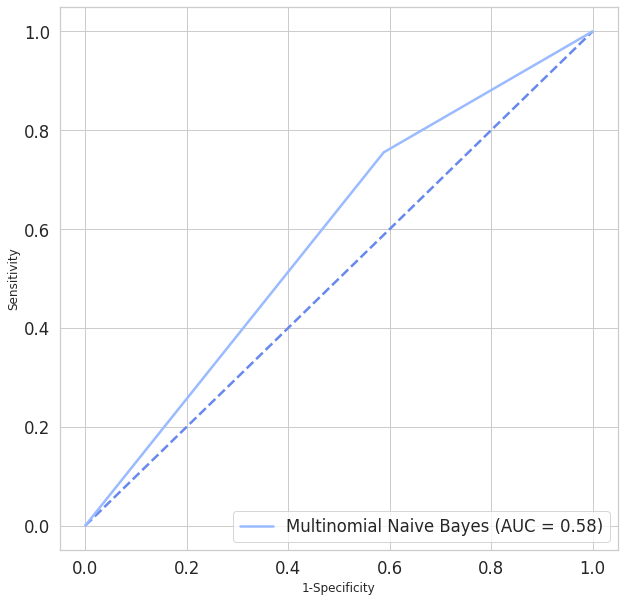

In [0]:
fpr, tpr , thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr, label='Multinomial Naive Bayes (AUC = %0.2f)'% mnb_auc)
plt.xlabel("1-Specificity",fontsize=12)
plt.ylabel("Sensitivity",fontsize=12)
plt.legend(loc='lower right')
plt.show()